<a href="https://colab.research.google.com/github/the-Fish2/Flight-Sheets/blob/main/Heuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## All Heuristics

### Test Files

In [ ]:
!pip install evaluate
!pip install rouge_score
!pip install markdownify
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [ ]:
import evaluate
import os
from markdownify import markdownify as md
import json

In [ ]:
inputContent1 = [
  {'content': '<p>If someone could explain what\'s going on here, that would be great, because I\'m at a loss. (A fix would be even better! <span aria-label="wink" class="emoji emoji-1f609" role="img" title="wink">:wink:</span>)</p>\n<div class="codehilite" data-code-language="Lean"><pre><span></span><code><span class="kn">import</span> <span class="n">Mathlib</span>\n\n<span class="kn">open</span> <span class="n">Matrix</span>\n\n<span class="kd">variable</span> <span class="o">{</span><span class="n">m</span> <span class="n">n</span> <span class="o">:</span> <span class="kt">Type</span><span class="bp">*</span><span class="o">}</span> <span class="o">[</span><span class="n">Fintype</span> <span class="n">n</span><span class="o">]</span> <span class="o">[</span><span class="n">DecidableEq</span> <span class="n">n</span><span class="o">]</span>\n\n<span class="kd">example</span> <span class="o">{</span><span class="n">R</span> <span class="o">:</span> <span class="kt">Type</span><span class="bp">*</span><span class="o">}</span> <span class="o">[</span><span class="n">CommRing</span> <span class="n">R</span><span class="o">]</span> <span class="o">[</span><span class="n">StarRing</span> <span class="n">R</span><span class="o">]</span> <span class="o">(</span><span class="n">A</span> <span class="o">:</span> <span class="n">unitaryGroup</span> <span class="n">n</span> <span class="n">R</span><span class="o">)</span> <span class="o">(</span><span class="n">B</span> <span class="o">:</span> <span class="n">Matrix</span> <span class="n">m</span> <span class="n">n</span> <span class="n">R</span><span class="o">)</span> <span class="o">:</span>\n    <span class="n">rank</span> <span class="o">(</span><span class="n">B</span> <span class="bp">*</span> <span class="o">(</span><span class="n">A</span> <span class="o">:</span> <span class="n">Matrix</span> <span class="n">n</span> <span class="n">n</span> <span class="n">R</span><span class="o">))</span> <span class="bp">=</span> <span class="n">rank</span> <span class="n">B</span> <span class="o">:=</span> <span class="kd">by</span>\n  <span class="n">simp</span><span class="bp">?</span> <span class="c1">-- simp only [UnitaryGroup.det_isUnit, rank_mul_eq_left_of_isUnit_det]</span>\n\n<span class="kd">example</span> <span class="o">{</span><span class="n">R</span> <span class="o">:</span> <span class="kt">Type</span><span class="bp">*</span><span class="o">}</span> <span class="o">[</span><span class="n">Field</span> <span class="n">R</span><span class="o">]</span> <span class="o">[</span><span class="n">StarRing</span> <span class="n">R</span><span class="o">]</span> <span class="o">(</span><span class="n">A</span> <span class="o">:</span> <span class="n">unitaryGroup</span> <span class="n">n</span> <span class="n">R</span><span class="o">)</span> <span class="o">(</span><span class="n">B</span> <span class="o">:</span> <span class="n">Matrix</span> <span class="n">m</span> <span class="n">n</span> <span class="n">R</span><span class="o">)</span> <span class="o">:</span>\n    <span class="n">rank</span> <span class="o">(</span><span class="n">B</span> <span class="bp">*</span> <span class="o">(</span><span class="n">A</span> <span class="o">:</span> <span class="n">Matrix</span> <span class="n">n</span> <span class="n">n</span> <span class="n">R</span><span class="o">))</span> <span class="bp">=</span> <span class="n">rank</span> <span class="n">B</span> <span class="o">:=</span> <span class="kd">by</span>\n  <span class="n">simp</span><span class="bp">?</span> <span class="c1">-- fails with no progress</span>\n</code></pre></div>',
  'id': 436895345,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714746522},
 {'content': '<p><span class="user-mention" data-user-id="310045">@Eric Wieser</span> <span aria-label="up" class="emoji emoji-2b06" role="img" title="up">:up:</span></p>',
  'id': 436895518,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714746585},
 {'content': "<p>With <code>set_option trace.Meta.Tactic.simp true</code>, I can see that in both cases, <code>simp</code> correctly tries <code>rank_mul_eq_left_of_isUnit_det</code>, but in the second case it fails to discharge the hypothesis with <code>UnitaryGroup.det_isUnit</code> because it doesn't even seem to try to unify with this.</p>",
  'id': 436896859,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714747057},
 {'content': '<p>nevermind, I figured it out.</p>',
  'id': 436898099,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714747277},
 {'content': '<p>In the case when <code>R</code> is a field, the trace in the second showed that it rewrote the discharging goal of <code>IsUnit (↑A)</code> to <code>det (↑A) ≠ 0</code> with <a href="https://leanprover-community.github.io/mathlib4_docs/find/?pattern=isUnit_iff_ne_zero#doc">docs#isUnit_iff_ne_zero</a>, which made it no longer try to discharge the goal with <a href="https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Matrix.UnitaryGroup.det_isUnit#doc">docs#Matrix.UnitaryGroup.det_isUnit</a> because the discharging goal no longer matched.</p>',
  'id': 436898778,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714747428},
 {'content': '<p>so for clarity, <code>simp [-isUnit_iff_ne_zero]</code> works.</p>',
  'id': 436899986,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714747789},
 {'content': '<p>I guess for confluence, you could add <code>det (↑A) ≠ 0</code> as a simp lemma</p>',
  'id': 436900120,
  'sender_full_name': 'Eric Wieser',
  'timestamp': 1714747818},
 {'content': '<p>Eric, I guess this is some non-confluence in our <code>simp</code> set here. We should ultimately decide what to do, and if <a href="https://github.com/leanprover-community/mathlib4/pull/12244">#12244</a> was the wrong idea.</p>',
  'id': 436900152,
  'sender_full_name': 'Jireh Loreaux',
  'timestamp': 1714747829},
 {'content': '<p>Does making <a href="https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Matrix.isUnit_iff_ne_zero#doc">docs#Matrix.isUnit_iff_ne_zero</a> lower priority than <code>Unit.isUnit</code> make sense?</p>',
  'id': 436900222,
  'sender_full_name': 'Eric Wieser',
  'timestamp': 1714747858},
]

In [ ]:
claudeSample = {
 "question": "I'm having an issue with a Lean theorem prover code. It works fine when R is a CommRing, but fails when R is a Field. Here's the code:\n\nimport Mathlib\n\nopen Matrix\n\nvariable {m n : Type*} [Fintype n] [DecidableEq n]\n\nexample {R : Type*} [CommRing R] [StarRing R] (A : unitaryGroup n R) (B : Matrix m n R) :\n    rank (B * (A : Matrix n n R)) = rank B := by\n  simp? -- simp only [UnitaryGroup.det_isUnit, rank_mul_eq_left_of_isUnit_det]\n\nexample {R : Type*} [Field R] [StarRing R] (A : unitaryGroup n R) (B : Matrix m n R) :\n    rank (B * (A : Matrix n n R)) = rank B := by\n  simp? -- fails with no progress\n\nCan you explain what's going on and how to fix it?",
 "answer": "The issue you're experiencing is due to a non-confluence in the simplification rules used by Lean's theorem prover. Let me explain the problem and provide a solution:\n\n1. Problem explanation:\n   In the CommRing case, `simp?` successfully proves the theorem by applying the lemmas `UnitaryGroup.det_isUnit` and `rank_mul_eq_left_of_isUnit_det`.\n\n   However, in the Field case, the simplifier behaves differently. It rewrites the goal `IsUnit (↑A)` to `det (↑A) ≠ 0` using the lemma `isUnit_iff_ne_zero`. This rewrite prevents the application of `Matrix.UnitaryGroup.det_isUnit`, which would have discharged the goal in its original form.\n\n2. Solution:\n   You can resolve this issue by explicitly preventing the problematic rewrite. Use the following code for the Field case:\n\n   ```lean\n   example {R : Type*} [Field R] [StarRing R] (A : unitaryGroup n R) (B : Matrix m n R) :\n       rank (B * (A : Matrix n n R)) = rank B := by\n     simp [-isUnit_iff_ne_zero]\n   ```\n\n   This solution works by instructing the simplifier not to use the `isUnit_iff_ne_zero` lemma, allowing it to apply `Matrix.UnitaryGroup.det_isUnit` as intended.\n\n3. Debugging and understanding the issue:\n   To see what's happening behind the scenes with the simplifier, you can use the `trace.Meta.Tactic.simp` option. Add the following line at the beginning of your Lean file or just before the examples:\n\n   ```lean\n   set_option trace.Meta.Tactic.simp true\n   ```\n\n   This will output a trace of the simplifier's actions. In both cases, you'll see that `simp` correctly tries `rank_mul_eq_left_of_isUnit_det`, but in the Field case, it fails to discharge the hypothesis with `UnitaryGroup.det_isUnit` because it doesn't even seem to try to unify with this lemma after rewriting the goal.\n\n4. Root cause:\n   In the Field case, the trace shows that it rewrote the discharging goal of `IsUnit (↑A)` to `det (↑A) ≠ 0` with the `isUnit_iff_ne_zero` lemma. This made it no longer try to discharge the goal with `Matrix.UnitaryGroup.det_isUnit` because the discharging goal no longer matched.\n\n5. Long-term considerations:\n   This issue highlights a need to address non-confluence in the simplification set. Possible approaches include:\n   - Adding `det (↑A) ≠ 0` as a simp lemma for better confluence.\n   - Adjusting the priority of `Matrix.isUnit_iff_ne_zero` to be lower than `Unit.isUnit`.\n\n   The Lean community may need to reconsider the changes introduced in PR #12244 to find the best approach for handling such cases.\n\nBy using the solution provided (`simp [-isUnit_iff_ne_zero]`), your code should work consistently in both the CommRing and Field cases. This solution prevents the problematic rewrite, allowing the simplifier to use `Matrix.UnitaryGroup.det_isUnit` as intended in both scenarios.",
 "keywords": [
   "non-confluence",
   "simplification rules",
   "rewrite",
   "priority",
   "PR #12244",
   "trace.Meta.Tactic.simp",
   "IsUnit (↑A)",
   "det (↑A) ≠ 0"
 ]
}

### Does the Lean Code work?

In [ ]:
!curl https://raw.githubusercontent.com/leanprover/elan/master/elan-init.sh -sSf | sh -s -- --default-toolchain leanprover/lean4:stable -y

info: downloading installer
info: syncing channel updates for 'stable'
info: latest update on stable, lean version v4.9.1
info: downloading component 'lean'
189.4 MiB / 189.4 MiB (100 %) 130.3 MiB/s ETA:   0 s
info: installing component 'lean'
info: default toolchain set to 'leanprover/lean4:stable'

  leanprover/lean4:stable installed - Lean (version 4.9.0, x86_64-unknown-linux-gnu, commit 1b78cb4836cf, Release)



In [ ]:
os.environ['PATH'] = f"/root/.elan/bin:{os.environ['PATH']}"

In [ ]:
!lean --version

Lean (version 4.9.0, x86_64-unknown-linux-gnu, commit 1b78cb4836cf, Release)


In [ ]:
import subprocess
import tempfile

def run_lean(code):
    with tempfile.NamedTemporaryFile(mode='w', suffix='.lean', delete=False) as tmp:
        tmp.write(code)
        tmp.flush()
        try:
            result = subprocess.run(['lean', tmp.name], capture_output=True, text=True, check=True)
            #print(result.stdout)
            os.unlink(tmp.name)

            return True
        except subprocess.CalledProcessError as e:
            #print("Error:")
            #print(e.stderr)
            os.unlink(tmp.name)

            return False

In [ ]:
lean_code = """
import data.list.basic
let a := ["hello", "world"]
let joined := String.intercalate "-" a
"""

run_lean(lean_code)

False

In [ ]:
#note need to strip backslashes

In [ ]:
# note: tiny code snippets in `` so not avoided. Maybe #by tactic or smthg to see if it exists?

In [ ]:
def testCode(text):
  code_arr = text.split('```')
  #print(len(code_arr))
  noCode = True
  for codeSnip in code_arr:
    if codeSnip.lower().startswith("lean"):
      noCode = False
      codeSnip = codeSnip[4:].strip()
      codeSnip = codeSnip.replace("\\", "")
      print(codeSnip)
      codeWork = run_lean(codeSnip)
      print(codeWork)
      if codeWork:
        return True

  return noCode

In [ ]:
testCode(claudeSample["question"])

True

### How accurate was GPT's summarization of the answer?

In [ ]:
#use rouge-l to compare dataset['cleaned_text'] for all messages after the first one and corresponding answer set. perfect summary: Rouge-L approaches 1

In [ ]:
def connectMessage(content):
  currThread = ""
  for message in content[1:]:
    content = md(message['content'])
    currThread2 = content + ". "
    currThread += currThread2
  return currThread

In [ ]:
def checkOverlap(claudeMessage, message):
    inputContent = connectMessage(message['text'])
    #print(inputContent)
    resultsA = rougeComp(claudeMessage['answer'], inputContent)
    resultsQ = rougeComp(claudeMessage['question'], md(message['text'][0]['content']))
    # print(resultsA['rouge1'])
    # print(resultsQ['rouge1'])
    if resultsQ['rouge1'] > 0.75 and resultsA['rouge1'] > 0.30:
      return True;
    else:
      return False;

In [ ]:
# rougeComp(claudeSample['answer'], inputContent)

In [ ]:
# rougeComp(claudeSample['answer'], inputContent)

In [ ]:
# rougeComp(claudeSample['question'], md(inputContent1[0]['content']))

In [ ]:
# print(md(claudeSample['question']))

In [ ]:
# print(md(inputContent1[0]['content']))

In [ ]:
# print(inputContent)

In [ ]:
# print((claudeSample['answer']))

In [ ]:
# answer + question overlap?
#actually a good answer would probably have a lot similar to the question, like the user's code.
# if (rougeComp(claudeSample['question'], claudeSample['answer'])['rouge1'] < 0.5)

In [ ]:
checkOverlap(claudeSample, {'text': inputContent1})

NameError: name 'rougeComp' is not defined

### Too Long?

In [ ]:
!pip install tiktoken

In [ ]:
import tiktoken
encoding = tiktoken.get_encoding("cl100k_base")

In [ ]:
def checkTokenLength(encodeStr: str, max_tokens=1000):
  strEncoding = encoding.encode(encodeStr)
  if (len(strEncoding) < max_tokens):
    #print(len(strEncoding))
    return True;
  else:
    return False;
  # if (len(strEncoding) > max_tokens):
  #   strEncoding = strEncoding[:max_tokens]
  # encode = encoding.decode(strEncoding)
  # return encode

In [ ]:
checkTokenLength(connectMessage(inputContent1))

### No content?

In [ ]:
# messages are very rapidly after each other
# more than 10 authors
# if a message is less than 5 words long, maybe just remove it? NO, bc, "PR xxx" and "Ok, thank you" are both like useful

#Messages like this bad: maybe the total messages should span 2 days?
#I think 5 - 20 messages optimal? no but threads are typically very short (easy) or very long (harder/minor technicalities)
#ok so maybe difference between first and last message should span 1 hour

# Josha Dekker (Dec 18 2023 at 08:38):
# I've started formalising Lindelöf spaces and their basic API analogously to Compact spaces, let me know if you'd like an up-to-date version of what I have. (I have a PR out with the basic definitions, first theorems are in the making.)

# Yaël Dillies (Dec 18 2023 at 08:39):
# (PR is #9107)

# Josha Dekker (Dec 18 2023 at 12:31):
# Current progress is about the first 8-10 theorems defined as much verbatim as possible from Compact (I’m still filling in one gap). I’ll make a PR with them soon, to keep the number of lines low (around 150).

# Josha Dekker (Dec 18 2023 at 13:40):
# PR #9107 now updated.

# This is like 1 hr away but still good: https://leanprover-community.github.io/archive/stream/287929-mathlib4/topic/congr.20hogging.20up.20holes.html

In [ ]:
#last message from initial sender is POSITIVE (ie "that worked" or "thank you" or 'problem solved")

In [ ]:
# Unresolved, vs
# Yaël Dillies (Nov 29 2023 at 13:06):
# Could we come to a conclusion? This is blocking my PRs with no actionable solution from my part.

In [ ]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
def predict_sentiment(text, tokenizer=tokenizer, model=model):
    # Tokenize the input text
    inputs = tokenizer.encode_plus(
        text,
        return_tensors='pt',
        truncation=True,
        padding=True,
        max_length=512
    )

    # Get model predictions
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)

    # Get the sentiment label (0 to 4, where 0 is very negative and 4 is very positive)
    predicted_label = torch.argmax(probabilities, dim=1).item()

    return predicted_label, probabilities

# Example usage
#0 text = "Could we come to a conclusion? This is blocking my PRs with no actionable solution from my part."
#4 text = "refine' is really useful to build a refine call."
#2 text = "I'll write a couple of helper lemmas to prove non-emptiness of the grassmannian (like if the finrank is at least r then the grassmannian is not empty)."
#3 text = "We have a basic implementation of slim_check in Mathlib."
#2 text = """
# I don't think I've defined length in a coordinate-dependent way actually - I just did it as the integral over the norm of the derivative as a function on . Of course that only works right for differentiable paths though, so I agree that this should probably be done more generally in mathlib.
# What I'm really here to ask about is not lengths of paths though, but the lemmas on differentiability outlined above. I'd assume that with smooth paths being so common in differential geometry they'd still be useful to have around - or is differentiability also something that should be talked about only in terms of γ.extend, not just in the proofs of those lemmas but also their statements?"
# """
#0 text = "That doesn't work, but thanks anyways."
#0 text = "Unfortunate that no solution exists. "
# predicted_label, probabilities = predict_sentiment(text, tokenizer, model)
# print(f"Predicted label: {predicted_label}")
# print(f"Probabilities: {probabilities}")

NameError: name 'tokenizer' is not defined

In [ ]:
def checkSentiment(content):
  init_author = content[0]['sender_full_name']
  last_msg = ""
  counter = 0;
  for message in content:
    if message['sender_full_name'] == init_author:
      counter += 1;
      last_msg = message['content']

  predicted_label, probabilities = predict_sentiment(last_msg)
  #print(predicted_label, probabilities)
  if predicted_label > 0 or counter == 1:
    return True
  else:
    return False

In [ ]:
def checkTime(content):
  init_time = content[0]['timestamp']
  end_time = content[-1]['timestamp']

  if (end_time - init_time > 600):
    return True;
  else:
    return False;

In [ ]:
# checkTime(input_message['text']), checkSentiment(input_message['text'])

### Qualified authors and message counts

In [ ]:
AUTHOR_NAMES = [
    "Mario Carneiro",
    "Eric Wieser",
    "Kevin Buzzard",
    "Yaël Dillies",
    "Scott Morrison",
    "Johan Commelin",
    "Adam Topaz",
    "port-progress bot",
    "Kyle Miller",
    "Yury G. Kudryashov",
    "Patrick Massot",
    "Reid Barton",
    "Sebastian Ullrich",
    "Riccardo Brasca",
    "Eric Rodriguez",
    "Jireh Loreaux",
    "Heather Macbeth",
    "Damiano Testa",
    "Arthur Paulino",
    "Gabriel Ebner",
    "Henrik Böving",
    "Matthew Ballard",
    "James Gallicchio",
    "Thomas Murrills",
    "Ruben Van de Velde",
    "Alex J. Best",
    "Junyan Xu",
    "Martin Dvořák",
    "Michael Stoll",
    "Floris van Doorn",
    "Violeta Hernández",
    "Yakov Pechersky",
    "Patrick Thomas",
    "Terence Tao",
    "Leonardo de Moura",
    "Sam Ezeh",
    "Chris Hughes",
    "Johan Commelin",
    "Kenny Lau",
    "Patrick Massot"
]

In [ ]:
def checkMessage(content, max_authors=10, max_msg=25):
  userID = content[0]['sender_full_name']
  authorset = set([userID])
  currThread = ""
  lastSender = ""
  qualifiedAuthor = False

  for message in content:
    name = message['sender_full_name']
    authorset.add(name)

    if name in AUTHOR_NAMES:
      qualifiedAuthor = True

    if name == "Notification Bot":
      if "resolved" in message['content']:
        return True

  if len(authorset) > max_authors or len(content) < 2 or not qualifiedAuthor or len(content) > max_msg:
    return False
  else:
    return True


In [ ]:
checkMessage(inputContent1)

True

In [ ]:
#message length imbalance? but quite a few have very long questions and shorter answers bc people need to set up like context

### Complete Checks

In [ ]:
input_message = {"text": inputContent1, "cleaned_text": connectMessage(inputContent1)}
claudeSample = claudeSample

In [ ]:
def run_checks(input_message, claudeSample, checks):
    index = 0;
    for check in checks:
        index += 1
        if not check(input_message, claudeSample):
            print(index)
            return False
    return True

In [ ]:
def allHeuristics(input_message):
    checks = [
        lambda im, cs: checkMessage(im['text']),
        lambda im, cs: checkTime(im['text']),
        lambda im, cs: checkSentiment(im['text']),
        lambda im, cs: checkTokenLength(im['cleaned_text'], 2500)
    ]
    return run_checks(input_message, None, checks)

In [ ]:
def allHeuristicsClaude(input_message, claudeSample):
    checks = [
        #lambda im, cs: testCode(cs['answer']),
        lambda im, cs: checkOverlap(cs, im),
        lambda im, cs: all_elements_in_string(cs['keywords'], cs['answer'])
    ]
    return run_checks(input_message, claudeSample, checks)

In [ ]:
allHeuristics(input_message), allHeuristicsClaude(input_message, claudeSample)

NameError: name 'input_message' is not defined

In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/ClusterDataset.json', 'r') as f:
  clusterDS = json.load(f)

In [ ]:
len(clusterDS)

36

In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/Large/lean4EmbeddingsDS90Large.json', 'r') as f:
  dataset = json.load(f)
  print(dataset[0].keys())

dict_keys(['cleaned_text', 'text', 'timestamp', 'index', 'embedding', 'cluster', 'cluster72'])


In [ ]:
clusters = set()
for i in dataset:
  clusters.add(i['cluster'])

In [ ]:
for i, cluster in tqdm(enumerate(clusterDS), position=0, leave=True):
  for message in tqdm(cluster, position=0, leave=True):
    if allHeuristics(message):
      filteredClusterMsgs[i].append(message)
  print(len(filteredClusterMsgs[i]))

  0%|          | 0/193 [00:00<?, ?it/s]
0it [00:00, ?it/s]


NameError: name 'allHeuristics' is not defined

In [ ]:
filteredClusterMsgs = [[] for i in range(36)]

In [ ]:
from tqdm import tqdm

In [ ]:
print(len(clusterDS[22])) #this is the cluster with only 3 that passed the test. ok this is the notification bot cluster. irrelevant.

In [ ]:
clusterDS[22][7]['cleaned_text']

In [ ]:
print(filteredClusterMsgs[0][6]['cleaned_text'])

In [ ]:
import json

In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/filteredClusterDataset.json', 'r') as f:
  filterDS = json.load(f)

In [ ]:
sum(len(x) for x in filterDS)

4333

In [ ]:
print(filterDS[0][5]['cleaned_text'])

tsuki  hao: Can someone explain `\exf` to me in a simpler way?

. Eric Wieser: Do you mean [docs\#Filter.Frequently](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Filter.Frequently#doc) ?

. 


## Final heuristic: Bad questions.

In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/filteredClusterDataset.json', 'r') as f:
  filterDS = json.load(f)

In [ ]:
total = 0
for k, i in enumerate(filterDS):
  total += len(filterDS)
  print(k)
  print(i[0]['cleaned_text'])
  break
print(total)

0
Kaiyu Yang: Hi, I wonder if there is a way to check if the machine is a x64 (Intel) Mac or arm64 (Apple Silicon) Mac. I was only able to find functions like `System.Platform.isOSX` but that does not solve the problem. Thanks!

. Mario Carneiro: `lake exe cache` is currently using this code to determine the architecture (on OSX/linux, on windows we just assume x86\):



```
    let mut arch ← (·.trim) <$> runCmd "uname" #["-m"] false
    if arch = "arm64" then arch := "aarch64"
    unless arch ∈ ["x86_64", "aarch64"] do
      throw $ IO.userError s!"unsupported architecture {arch}"

```
. Mario Carneiro: (`runCmd` is just a wrapper around `IO.Process.output`)

. Kaiyu Yang: Thank you Mario!

. 
36


In [ ]:
filterDS[3][16]['cleaned_text']

'Jon Eugster: I recently had an [issue report](https://github.com/leanprover-community/lean4game/issues/241) which essentially said that a user didn\'t have `C++` on their Windows machine and therefore failed to build a lean package that used FFI (foreign\\-function\\-interface).\n\n\nThe [FFI used in lean4\\-i18n](https://github.com/hhu-adam/lean-i18n/blob/e493a4f7f0d51b6707c9d11bd0488d2f26b58bd0/lakefile.lean#L30-L34) is following the [official example](https://github.com/leanprover/lean4/blob/1f732bb3b7fa8e93ca01c1b257668aee14d72d2d/src/lake/examples/ffi/lib/lakefile.lean#L14-L18):\n\n\n\n```\ntarget time.o pkg : FilePath := do\n  let oFile := pkg.buildDir / "c" / "time.o"\n  let srcJob ← inputFile <| pkg.dir / "time" / "c" / "time.cpp"\n  let weakArgs := #["-I", (← getLeanIncludeDir).toString]\n  buildO oFile srcJob weakArgs #["-fPIC"] "c++" getLeanTrace\n\n```\n\nFirst of all, is it typical for Windows users to not have `C++` available per default? And if so, what are the recommen

In [ ]:
import json

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
api_key = userdata.get('OpenAIKey')

from openai import OpenAI
client = OpenAI(api_key = api_key)

In [ ]:
model = 'gpt-3.5-turbo-0125'
model = 'gpt-4o'

In [ ]:
prompt = """

\nCONVERSATION 1: {} // TRUE
\nCONVERSATION 2: {} // FALSE
\nCONVERSATION 3: {} // TRUE
\nCONVERSATION 4: {} // FALSE
\nCONVERSATION 5: {} // FALSE
\nCONVERSATION 6: {} // TRUE
\nCONVERSATION 7: {} // TRUE

Classify the following conversations based on whether they are relevant to programming in Lean 4 and resolved, returning an array of values of True or False.

""".format(filterDS[16][0]['cleaned_text'], filterDS[9][0]['cleaned_text'], filterDS[17][0]['cleaned_text'],
           filterDS[3][16]['cleaned_text'], filterDS[26][0]['cleaned_text'], filterDS[23][0]['cleaned_text'], filterDS[0][9]['cleaned_text']
           )

In [ ]:
filterDS[9][0]['cleaned_text']

"George Kojonis: Partially Ordered Sets, Lattices etc. can be thought of as being defined on certain underlying Sets. In the classes of mathlib though, those structures are defined on certain Types. \n\n\nHow do I reason about simple Set theoretic operations (such as union, intersection etc.) on the underlying Sets of the Domain Theoretic structures when they are defined on Types instead of Sets?   \n\n(I apologize for the stupid question, I've been trying to understand how Lean works for a while now and I still feel very lost)\n\n. Yaël Dillies: To take the union of orders, you use types such as [docs\\#Sum](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Sum#doc) and [docs\\#Lex](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Lex#doc). Eg [docs\\#Sum.Lex.partialOrder](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Sum.Lex.partialOrder#doc) is the lexicographic sum of two orders. Intersection does not really make sense without

In [ ]:
print(prompt)

 


CONVERSATION 1: Ian Jauslin: Hello!  

I'm trying to perform a rewrite inside an `IsLittleO` statement. For the sake of example, let's say I had two functions f and g, and I knew that f(h)\=g(h). Suppose I also knew that f(h)\=o(h) and wanted to prove that g(h)\=o(h). I would like to rewrite g(h) in the goal, but it's not so easy because h is not a variable. I figured out how to do this with `conv`, but it doesn't seem very efficient... How should I do this?


Here is the example code with my inefficient solution.



```
import Mathlib.Analysis.Complex.Basic
import Mathlib.Analysis.Asymptotics.Asymptotics

example (f g : ℂ → ℂ) (hfg : ∀ h, g h = f h) :
    Asymptotics.IsLittleO (nhds 0) (fun h ↦ f h) (fun h ↦ h)
    → Asymptotics.IsLittleO (nhds 0) (fun h ↦ g h) (fun h ↦ h) := by
  intro ho
  conv =>
    lhs
    intro h
    rw [hfg h]
  exact ho

```
. Eric Rodriguez: For the case you mention, [docs\#funext](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=funext#

In [ ]:
filteredDS = [[] for i in range(36)]

In [ ]:
def gptComplete(text, mt=150, engine=model, stop=None):
  output = client.chat.completions.create(
      model=engine,
      messages=[
          {"role": "user", "content": text},
      ],
      max_tokens=mt,
      temperature=0.0,
      n=1,
      stop=stop,
      logprobs=None
  )

  return output

In [ ]:
def makeBatch(texts):
  filePath = 'requests.jsonl'
  with open(filePath, 'w') as file:
    for i, text in enumerate(texts):
      request = {
          "custom_id": f"request-{i+1}",
          "method": "POST",
          "url": "/v1/chat/completions",
          "body": {
              "model": model,
              "messages": [
                  {"role": "user", "content": text},
              ],
              "temperature":0.0,
              "n":1,
              "logprobs":None,
          }
      }
      file.write(json.dumps(request, default=list) + '\n')

    %cd /content/
    batch_input_file = client.files.create(
      file=open(filePath, "rb"),
      purpose="batch"
    )

    batch_input_file_id = batch_input_file.id

    client.batches.create(
        input_file_id=batch_input_file_id,
        endpoint="/v1/chat/completions",
        completion_window="24h",
        metadata={
          "description": "Keyword refining"
        }
    )

In [ ]:
promptList = []
for clusterInd, cluster in enumerate(filterDS):
  if clusterInd in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]:
    continue;

  for i in range(0, len(cluster), 5):
    #print(i)

    if (i + 5 < len(cluster)):
      full_prompt = prompt + "\n".join([f"CONVERSATION {index+1}: {msg['cleaned_text']} " for index, msg in enumerate(cluster[i:i+5])]) + "\n"
    else:
      full_prompt = prompt + "\n".join([f"CONVERSATION {index+1}: {msg['cleaned_text']} " for index, msg in enumerate(cluster[i:])]) + "\n"

    promptList.append(full_prompt)

  # if clusterInd == 30:
  #   break;


NameError: name 'prompt' is not defined

In [ ]:
len(promptList)

115

In [ ]:
makeBatch(promptList)

/content


In [ ]:
len(filterDS[12]), len(filterDS[13]), len(filterDS[14]), len(filterDS[15])

(87, 74, 92, 85)

In [ ]:
currInd = 31;

with open('/content/batch_6UHPwBR41LKpNhsmSSSP8kjz_output.jsonl', 'r') as f:

  totalAnsArr = []
  for line in f:
    resp = json.loads(line);

    currResp = resp['response']['body']['choices'][0]['message']['content']
    totalAnsArr.extend([eval(currResp)])

In [ ]:
startInd = 0;
for i, cluster in enumerate(filterDS[currInd:]):
  currAnsArr = []
  while (len(currAnsArr) < len(cluster)):
    currAnsArr.extend(totalAnsArr[startInd])
    startInd += 1;
  print(len(currAnsArr))
  filteredDS[currInd + i] = [data for data, filter in zip(cluster, currAnsArr) if filter or filter=='True']


144
117
121
77
120


In [ ]:
totalAnsArr

[[False, True, True, True, False],
 [False, True, True, True, True],
 [False, True, True, False, False],
 [True, True, True, False, True],
 [False, True, True, True, False],
 [False, True, True, True, False],
 [True, True, True, True, True],
 [False, True, True, True, False],
 [False, True, True, False, True],
 [True, True, True, False, True],
 [False, False, False, True, True],
 [False, True, True, True, True],
 [False, True, False, True, False],
 [False, True, False, True, True],
 [False, True, True, True, True],
 [False, True, True, False, True],
 [False, True, True, False, True],
 [False, True],
 [False, True, True, True, True],
 [False, True, True, False, True],
 [False, True, True, False, True],
 [False, True, True, False, True],
 [False, True, True, False, False],
 [True, True, True, True, True],
 [False, False, True, True, False],
 [False, False, True, True, False],
 [False, True, True, True, False],
 [True, True, True, True, True],
 [False, True, True, False, True],
 [False, T

In [ ]:
total = 0
for i in range(36):
  print(len(filteredDS2[i]))
  total += len(filteredDS2[i])
print(total)

74
111
82
63
137
86
88
55
53
67
136
110
56
46
46
60
67
96
126
132
78
110
1
82
112
136
100
40
114
78
54
94
75
82
44
78
2969


In [ ]:
print(len(filteredDS[30]))

54


In [ ]:
print(filteredDS[22][0]['cleaned_text'])

Martin Dvořák: I see this in VS Code:  

[image.png](/user_uploads/3121/uGvOczscX4h2oMdwMcr1Vd5c/image.png)  

Is it the same thing as `lake exe cache get`?


[![](/user_uploads/3121/uGvOczscX4h2oMdwMcr1Vd5c/image.png)](/user_uploads/3121/uGvOczscX4h2oMdwMcr1Vd5c/image.png "image.png"). Marc Huisinga: You can click on the `(Details)` link and it will show you that it is in fact running `lake exe cache get`.

. Notification Bot: Martin Dvořák has marked this topic as resolved.

. 


In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/filteredEvalDataset.json', 'w') as f:
  json.dump(filteredDS, f)

In [ ]:
filterDS[22][0]['cleaned_text']

'Martin Dvořák: I see this in VS Code:  \n\n[image.png](/user_uploads/3121/uGvOczscX4h2oMdwMcr1Vd5c/image.png)  \n\nIs it the same thing as `lake exe cache get`?\n\n\n[![](/user_uploads/3121/uGvOczscX4h2oMdwMcr1Vd5c/image.png)](/user_uploads/3121/uGvOczscX4h2oMdwMcr1Vd5c/image.png "image.png"). Marc Huisinga: You can click on the `(Details)` link and it will show you that it is in fact running `lake exe cache get`.\n\n. Notification Bot: Martin Dvořák has marked this topic as resolved.\n\n. '

In [ ]:


# responseArrs = [r['response']['body']['choices'][0]['message']['content'] for r in responses]
# print(len(responseArrs))

# indexLen = 0

# for clusterInd, cluster in enumerate(filterDS[:16]):
#   if clusterInd in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
#     continue;

#   totalAnsArr = []
#   for i in range(0, len(cluster), 5):
#     totalAnsArr += responseArrs[indexLen]

#   print(indexLen)
#   print(len(totalAnsArr))
#   print(len(cluster))

#   filteredDS[clusterInd] = [data for data, filter in zip(cluster, totalAnsArr) if filter or filter=='True']

#   indexLen += (int)(len(cluster)/5)
#   if (len(cluster) % 5 != 0):
#     indexLen += 1

JSONDecodeError: Extra data: line 2 column 1 (char 571)

In [ ]:
print(len(promptList))

69


In [ ]:
makeBatch(promptList)

/content


In [ ]:
for clusterInd, cluster in enumerate(filterDS):
  if clusterInd in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    continue;

  #print('hi')
  totalAnsArr = []
  for i in range(0, len(cluster), 5):
    #print(i)

    if (i + 5 < len(cluster)):
      full_prompt = prompt + "\n".join([f"CONVERSATION {index+1}: {msg['cleaned_text']} " for index, msg in enumerate(cluster[i:i+5])]) + "\n"
    else:
      full_prompt = prompt + "\n".join([f"CONVERSATION {index+1}: {msg['cleaned_text']} " for index, msg in enumerate(cluster[i:])]) + "\n"

    promptResponse = gptComplete(full_prompt)
    # print(promptResponse)
    ans = promptResponse.choices[0].message.content
    ansArr = eval(ans)
    # if (len(ansArr) != 5):
    #   print(len(ansArr))
    #   print(ansArr)
    #print(ansArr)
    #print(len(ansArr))
    totalAnsArr.extend(ansArr)
    # for j in range(len(ansArr)):
    #   if ansArr[j]:
    #     filteredDS[clusterInd].append(cluster[i+j])
  #print(totalAnsArr)
  print(len(totalAnsArr))
  print(len(cluster))

  filteredDS[clusterInd] = [data for data, filter in zip(cluster, totalAnsArr) if filter or filter=='True']

NotFoundError: Error code: 404 - {'error': {'message': 'This is not a chat model and thus not supported in the v1/chat/completions endpoint. Did you mean to use v1/completions?', 'type': 'invalid_request_error', 'param': 'model', 'code': None}}

In [ ]:
print(totalAnsArr)

[False, True, True, False, False, False, True, True, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, False, True, False, False, True, True, False, False, True, True, False, True, False, True, True, False, False, True, True, True, True, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, False, True, True, False, False, False, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, True, True, False]


In [ ]:
len([False, True, True, False, False, False, True, True, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, False, True, False, False, True, True, False, False, True, True, False, True, False, True, True, False, False, True, True, True, True, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, True, False, True, True, False, False, False, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, False, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, True, True, False])

137

In [ ]:
print(len(filteredDS[12]))

0


In [ ]:
#  filteredDS[1] = [data for data, filter in zip(cluster, totalAnsArr) if filter or filter=='True']

In [ ]:
print(full_prompt)

 


CONVERSATION 1: Bernardo Borges: Following this [\#question](#narrow/stream/113489-new-members/topic/.E2.9C.94.20Rewrite.20inside.20BigOperators), I am now stuck when the next step is not a `rewrite`, but it is an `apply`. For example, I want to further divide the proof in lemmas, to prove them individually, but I can't just apply the lemma to the specific pattern:



```
import Mathlib.Data.Fin.Tuple.Reflection

open BigOperators

-- # Need to achieve this proof for BigOperators
lemma min_sum_le_sum_min
  (A n B : ℕ)
  : min A (∑i:Fin n,B) ≤ ∑i:Fin n,min A B := by sorry -- deal with it later

theorem min_sum_le_sum_min_ite
  (A : ℕ)
  (xs : Fin n → Fin 2)
  (as : Fin n → ℕ × ℕ)
  : min A (∑ x : Fin n, if xs x = 1 then (as x).1 else (as x).2)
  ≤ (∑ x : Fin n, min A (if xs x = 1 then (as x).1 else (as x).2)) := by
  -- use the lemma in this specific case, where B depends on i
  apply min_sum_le_sum_min A n (B:=if xs _ = 1 then (as _).1 else (as _).2)
  /-
  tactic 'apply' failed, f

In [ ]:
print(len(cluster))

107


In [ ]:
print(ans)

[False, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True]


In [ ]:
print(filteredDS[0])

In [ ]:
eval(ans)[0]

False

In [ ]:
print(filterDS[0][9]['cleaned_text'])

Xiyu Zhai: As a newbie (an excuse I will use for at least three months), I'm curious what is builtin\_initialize in the Lean source code? I couldn't find an explanation myself.

. Xiyu Zhai: Where's the general place for explanation of compiler magic?

. Xiyu Zhai: Does it mean something like in a scripting language, it will be executed when loaded?  

Something like lazy\_static in Rust?

. Kyle Miller: There are two things going on here:


1. Yes, it is possible to associate code to modules that gets run when the module is loaded. This is the initialization code. It's only for compile time and not for run time (as far as I've understood).
2. The `builtin` part has to do with the staged compilation of Lean 4 itself. Since Lean 4 is largely written in Lean 4, some parts of it need to be set to be part of the compiled "stage 0" Lean 4, which is used to compile the next stage. I'm not super clear on the details, but [here's the boostrapping page](https://lean-lang.org/lean4/doc/dev/boots

In [ ]:
# prompt = prompt.replace('ANS', filterDS[2][0]['cleaned_text'])
# prompt = prompt.replace('ANW', filterDS[3][2]['cleaned_text'])

In [ ]:
print(filterDS[2][0]['cleaned_text'])

Chris Hughes: I had a go at making a bunch of stuff to do with `TensorProduct` irreducible to see if it would improve performance in [!4\#3555](https://github.com/leanprover-community/mathlib4/pull/3555) It didn't seem to make much difference, but it did throw up an interesting diamond. If I add the following code [here](https://github.com/leanprover-community/mathlib4/blob/4f2edb73f3c73ce6bfb9d1a57fe3622ae5dd65fb/Mathlib/LinearAlgebra/TensorProduct.lean#L322) then `rfl` fails



```
example : @Units.instSMulUnits (ℕˣ) (M ⊗[R] N) _ _ = TensorProduct.leftHasSMul :=
  rfl --fails

```

This is not a diamond in current Mathlib4 master, but the commutavity relies on the defeq `a • (x ⊗ₜ y) = (a • x) ⊗ₜ y`, which itself relies on unfolding everthing to `AddCon` and then to `Quot` and using the defeq `Quot.lift_mk`. I don't know if this is a really bad thing, but it's possible that this sort of thing is behind some of the performance problems we've been having and it's certainly worth being 

In [ ]:
prompt

' \n\nClassify the following messages based on whether they are relevant to programming in Lean 4 and resolved, returning True or False. \n\n\nCONVERSATION 1: Bernardo Borges: Following this [\\#question](#narrow/stream/113489-new-members/topic/.E2.9C.94.20Rewrite.20inside.20BigOperators), I am now stuck when the next step is not a `rewrite`, but it is an `apply`. For example, I want to further divide the proof in lemmas, to prove them individually, but I can\'t just apply the lemma to the specific pattern:\n\n\n\n```\nimport Mathlib.Data.Fin.Tuple.Reflection\n\nopen BigOperators\n\n-- # Need to achieve this proof for BigOperators\nlemma min_sum_le_sum_min\n  (A n B : ℕ)\n  : min A (∑i:Fin n,B) ≤ ∑i:Fin n,min A B := by sorry -- deal with it later\n\ntheorem min_sum_le_sum_min_ite\n  (A : ℕ)\n  (xs : Fin n → Fin 2)\n  (as : Fin n → ℕ × ℕ)\n  : min A (∑ x : Fin n, if xs x = 1 then (as x).1 else (as x).2)\n  ≤ (∑ x : Fin n, min A (if xs x = 1 then (as x).1 else (as x).2)) := by\n  -- use 

In [ ]:
gptComplete(prompt)

ChatCompletion(id='chatcmpl-9m2vsXpTJnd88jj5AbLLnyjA7wwTY', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='[False, True]', role='assistant', function_call=None, tool_calls=None))], created=1721238044, model='gpt-3.5-turbo-0125', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=5, prompt_tokens=7435, total_tokens=7440))

## Building Eval Dataset

In [ ]:
#for each cluster, run all elements through. print number of passing elements.
#hopefully roughly evenly distributed.
#then plug them all into chatgpt for further fixing up.

In [ ]:
# print(filterDS[3][15]['cleaned_text'])

Michael Stoll: 
```
import Mathlib

set_option trace.Meta.synthInstance true

```

This produces 



```
Forbidden set_option `trace.Meta.synthInstance`; please remove
note: this linter can be disabled with `set_option linter.setOption false`

```

when pasted into the web editor.


It looks like the Mathlib linters are activated there by mistake?

. Michael Stoll: (Without the `import`, the message goes away.)

. Michael Rothgang: Indeed, this is a (very recent) mathlib linter firing. Should this not happen?

. Michael Rothgang: Alternatively, it wouldn't be hard to scope the linter to `Mathlib` only. Would this be better?

. Michael Stoll: You want to be able to trace/profile/... stuff without being bothered by warnings also in the Web Editor, I would think.

. Michael Stoll: My understanding is that this is a linter that should make sure that files submitted to Mathlib do not contain noisy commands. But it should not be active in files that just *use* Mathlib.

. Damiano Testa: Othe

In [ ]:
# prompt = """
# Given this thread of messages, please reformulate it as one question and answer pair between a user and an assistant without changing the user's initial message. Please refine the answer so that the explanation provided by the responder is completely reflected in the given answer. In addition, consider the main issue resolved in this conversation, the source of the confusion, and how the issue was resolved, if at all. Use this information to extract a list of key words that cover all topics of the answer and are each necessary in determining the answer. Then, repackage all this as a JSON message of the following format: {question: str, answer: str, keywords: List[str]}, and return only the JSON message.
# """

In [ ]:
# currPt =  prompt + 'CONVERSATION: """ ' + filterDS[3][15]['cleaned_text'] + ' """ '

In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/filteredEvalDataset.json', 'r') as f:
  filterDS = json.load(f)

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset 3/evalDatasetFiltered2.json', 'r') as f:
  filterDS2 = json.load(f)

In [ ]:
for i in range(15):
  print(filterDS[0][i]['cleaned_text'][:100])

Kaiyu Yang: Hi, I wonder if there is a way to check if the machine is a x64 (Intel) Mac or arm64 (Ap
RL: Hello,


What is the recommended way to define a function over the natural integers when it is n
Jon Eugster: I need some help with String operations.


a) given a `String` of unknown length, how d
Joachim Breitner: What is the idiomatic way to say 



```
logInfo m!"Something about {name}"

```


Alok Singh: this is from some julia code in <https://github.com/chakravala/Grassmann.jl/commit/28011
Joachim Breitner: Maybe I’m too tired, but given a `ConstInfo`, how do I find the module it was defi
Thomas Murrills: Is there currently a systematic way to deprecate e.g. tactic syntax? This is for ca
Xiyu Zhai: As a newbie (an excuse I will use for at least three months), I'm curious what is builtin
dariof4: Is there an operator like haskells `>>` for monads? Which would have something like this de
Eduardo Ochs: Hi all, I've just adapted this thing \-


[http://anggtwu.net/eev\-maxima.htm

In [ ]:
print(filterDS2[0][0]['question'])
print(filterDS2[0][1]['question'])
print(filterDS2[0][2]['question'])
print(filterDS2[0][3]['question'])

Hi, I wonder if there is a way to check if the machine is a x64 (Intel) Mac or arm64 (Apple Silicon) Mac. I was only able to find functions like `System.Platform.isOSX` but that does not solve the problem. Thanks! How can I determine the architecture of my Mac?
What is the idiomatic way to log a message in Lean that includes a clickable global name, such as `name : Lean.Name`, so that it becomes clickable in the info view? Here is an example code snippet for context:

```lean
logInfo m!"Something about {name}"
```

How can I find the module and source position of a `ConstInfo` in Lean, and are `Lean.ModuleIdx` assigned sequentially for topological sorting?
I'm using Visual Studio Code with the Lean extension, and I often encounter the error `no definition found for 'classical'` even though my code works fine. How can I manually write the correct import to resolve this issue?


In [ ]:
print(len(filterDS[0]))

14


In [ ]:
#add keyword extraction part to prompt: for all answers, first reason / ask for keywords that are conceptually necessary
#need to include keyword rationales for the few shot examples / need to show few shot for rationales

In [ ]:
prompt1 = """

Given the following conversation, follow these steps:

1. Formulate a 'question' based on the message asking for help. Include any code samples and ensure it's comprehensible without context. Rephrase the question so that it appears professional and concise, and from a textbook instead of a forum.
2. Reformulate the conversation responses into an 'answer' from a helpful, polite, specific chat assistant. Ensure the answer fully addresses the question asked in the conversation. Both the question and answer should omit names.
3. Modify the 'answer' to include the main issue resolved, the source of confusion, and how the issue was resolved. The solution should be completely reflected in the given answer, which should be detailed, lengthy, and relevant.
"""

prompt2 = """

4. Analyze the response: What topics, ideas, theorems, or insights are necessary to arrive at acceptable answer to the question?
Come up with at least 15 key words or phrases, each with an explanation of why this item is necessary in any response that sufficiently answers the generated question.

5. Generate an initial list of at least 15 keywords or phrases that:
   a) Cover all necessary aspects of the answer
   b) Appear verbatim in the reference answer
   c) Include technical terms, precise concepts, and unique phrases
   d) Represent both the solution and the problem-solving process
   e) Do not discuss additional issues not referenced in the question
   For each keyword, explain why this keyword is necessary in all acceptable answers to the question. Sort these from most to least important.
"""

prompt3 = """"
6. Read each of the keyword's rationales. From these rationales, is it possible to reconstruct any good answer to the question?

7.
 Refine the keyword list to a list of 5 to 10 keywords, still sorted from most to least important, following these restraints:
   a) If a keyword has a rationale that is not detailed or it's rationale reveals that the keyword is unnecessary, remove the keyword
   b) Replace removed keywords with more specific, technical, or insightful keywords.

Here are some sample sets of answers:
{
  "question": "In Lean, when should the 'cases' tactic be used, and what are the alternatives when it does not work? Specifically, how can one handle cases where the goal is not a 'Prop' and involves types like 'List' or 'Fin'? Additionally, what are more elegant ways to handle if-then-else chaining in such scenarios?",
  "answer": "The 'cases' tactic in Lean is primarily used when the goal is a 'Prop', as it relies on the 'casesOn' method associated with inductive types, which is specialized for propositions. When the goal is not a 'Prop', such as when dealing with types like 'List' or 'Fin', the 'cases' tactic may not work due to type mismatches or other restrictions. In these situations, alternative approaches are necessary. For instance, you can use if-then-else chaining to handle different cases based on type equality. Here is an example of how to handle such cases elegantly without using 'cases':\n\n```lean\ndef splitNoCases' {α β : Nat} (a : Fin α) (b : Fin β) (γ : Nat) (γ_def : γ ∈ [α, β]) : Fin γ :=\n  if h : γ = α then\n    Fin.cast h.symm a\n  else if h' : γ = β then\n    Fin.cast h'.symm b\n  else\n    by exfalso; simp at γ_def; tauto\n```\n\nIn this example, the 'if h : γ = α' construct is used to check if 'γ' is equal to 'α', and if so, 'Fin.cast h.symm a' is used to cast 'a' to the appropriate type. Similarly, 'if h' : γ = β' handles the case where 'γ' is equal to 'β'. If neither condition is met, the 'exfalso' tactic is used to derive a contradiction, leveraging 'simp' and 'tauto' to simplify and resolve the goal.\n\nThe main issue resolved here is the limitation of the 'cases' tactic when the goal is not a 'Prop'. The source of confusion was the restriction of 'cases' to propositions and how to handle goals involving other types. The issue was resolved by using if-then-else chaining and type casting with 'Fin.cast', providing a more elegant and functional approach to handle such cases.")
	"keywords": {'cases', 'Prop', 'inductive type', 'type mismatch', 'Fin.cast', 'Fin.cast h.symm'}
}
In this case, keywords like 'exfalso' are not necessary to creating the response. However, keywords like 'Fin.cast' or 'type mismatch' are relevant to the question and necessary and important to the topic. These keywords cover all major topics of the answer.

{
  "question": In the context of defining a norm for an Octonion algebra over a field, how can one ensure that the norm function correctly utilizes the star operation for each component? The initial attempt to define the norm function using the star operation resulted in a 'failed to synthesize' error. The code snippet provided is as follows:\n\n```python\ndef Octonion.norm {α : Type} [Field α](p: 𝕆[α])  : α :=\n  p.re* p.re + p.e1*p.e1 + p.e2*p.e2 + p.e3*p.e3 + p.e4*p.e4 + p.e5*p.e5 + p.e6*p.e6 + p.e7*p.e7\n```\n\nThe goal is to modify it to use the star operation, such as `p.re*(star p.re) + ...`. How can one specify that the fields accept the star operation, and what adjustments are necessary to resolve the synthesis error?",
  "answer": 'To define a norm for an Octonion algebra over a field that correctly utilizes the star operation for each component, you need to ensure that the type `α` supports the star operation. This can be achieved by adding the `[StarRing α]` type class constraint. Here is the revised code snippet:\n\n```python\nimport Mathlib\n\n/-\nAn definition of the Octonion Algebra over field F denoted by 𝕆[F]\n-/\n\nstructure Octonion (α : Type u) where\n  re: α\n  e1: α\n  e2: α\n  e3: α\n  e4: α\n  e5: α\n  e6: α\n  e7: α\n\n/- Notation and output -/\n\nnotation "𝕆" => Octonion ℝ\n\nnotation "𝕆[" F "]" => Octonion F\n\n/- conjugation -/\ndef Octonion.star {α : Type} [Field α] (p : 𝕆[α]) : Octonion α := {\n    re := p.re,\n    e1 := -p.e1,\n    e2 := -p.e2,\n    e3 := -p.e3,\n    e4 := -p.e4,\n    e5 := -p.e5,\n    e6 := -p.e6,\n    e7 := -p.e7\n}\n\ndef Octonion.norm {α : Type} [Field α] [StarRing α] (p: 𝕆[α])  : α :=\n  p.re* (star p.re) + p.e1* (star p.e1) + p.e2* (star p.e2) + p.e3* (star p.e3) + p.e4* (star p.e4) + p.e5*(star p.e5) + p.e6*(star p.e6) + p.e7*(star p.e7)\n```\n\nThe main issue was that the type `α` did not have the star operation defined, which caused the synthesis error. By adding the `[StarRing α]` constraint, you ensure that `α` supports the star operation. Additionally, marking the `Octonion.star` function as `protected` can prevent naming conflicts. Alternatively, you can inline the star operation definition directly into the instance declaration to avoid scoping issues. This approach resolves the synthesis error and ensures that the norm function correctly utilizes the star operation for each component.'),
	"keywords": {'norm', 'Octonion algebra', 'star operation', '[StarRing a]', 'field', 'Octonion', 'synthesis error', 'Octonion.star', 'synthesis error}
}
Note that although alternative solutions are given, only the most important solution has associated keywords. The keywords should be solely the most important and necessary keywords.
{
  "question": "Why doesn't the `rw` tactic in Lean rewrite inside quantifiers, and how does it differ from `simp_rw`? Can you provide a detailed explanation and solution for beginners who find this counterintuitive?",
  "answer": "The `rw` tactic in Lean does allow rewriting under quantifiers, but it has a specific limitation: the rewritten term cannot reference any of the bound variables within the quantifier. This can be confusing for beginners because it seems like `rw` should be able to rewrite in all contexts. The `simp_rw` tactic, on the other hand, uses the `simp` tactic internally, which employs different techniques that allow it to rewrite under binders more reliably. This is because `simp` can use functional extensionality (`funext`) to navigate into subexpressions within binders, something `rw` cannot do as effectively. However, `simp` can only rewrite one thing at a time, which can be a limitation in cases involving complicated dependent types. Additionally, in Lean's type theory, functional extensionality does not hold without an additional axiom (`quot.sound`), which is necessary for rewriting under a lambda. This distinction is crucial for understanding why `rw` and `simp_rw` behave differently and how to use them appropriately in different contexts. For more detailed explanations, you can refer to discussions on the Lean community forums or consider creating a FAQ page for quick reference.",
  "keywords": {'bound variable', 'binders', 'functional extensionality', 'subexpressions', 'dependent types', 'type theory'}
}
These are the only keywords necessary to answering the question, and these keywords cover all the topics dicussed in the answer.
{
  "question": 'Given a `ConstInfo` in Lean, how can one determine the module in which it was defined and its source position? Additionally, are `Lean.ModuleIdx` values assigned sequentially, and can they be used to topologically sort modules in the import graph? Provide any relevant code samples for these tasks.',
  "answer": "To determine the module in which a `ConstInfo` was defined and its source position in Lean, you can use the following methods and code samples. For finding the source position of any name, you can utilize the `Lean.findDeclarationRanges?` function. This function will provide the source position of the declaration associated with the given name. For retrieving the module, the environment maintains a field `const2ModIdx` that maps constants to their respective module indices. You can use this field to find the module index and subsequently the module name. Here is a code sample that demonstrates how to get the module name for a given name using the environment's `getModuleIdxFor?` method and the `header.moduleNames` array: ```lean def getModuleNameFor? (env : Environment) (nm : Name) : Option Name := env.getModuleIdxFor? nm >>= fun i => env.header.moduleNames[i.toNat]? ``` Regarding the sequential assignment of `Lean.ModuleIdx` values, it appears that they are indeed assigned sequentially. This sequential assignment can be leveraged to topologically sort modules in the import graph.),
  "keywords": {'ConstInfo', 'Lean.findDeclarationRanges?', 'const2ModIdx', 'env.getModuleIdxFor', 'Lean.ModuleIdx', 'topologically sort', 'module'}
}
"""
prompt4 = """
Provide your answer as a json object with
    {
      "question": question,
      "answer": answer,
      "keywords": [
        {
          "keyword": keyword,
          "rationale": detailed explanation of keyword's importance and relevance
        },
        ...
      ]
    }
"""


In [ ]:
prompt2 = """ Given the following question and answer pair between a chat assistant and user, complete the following steps:

1. Analyze the answer: What topics, ideas, theorems, or insights are necessary to arrive at this answer? Come up with at least 15 items, each with an explanation of its necessity. Include both obvious and non-obvious elements.

2. Generate an initial list of at least 15 keywords or phrases that:
   a) Cover all necessary aspects of the answer
   b) Appear verbatim in the reference answer
   c) Include technical terms, precise concepts, and unique phrases
   d) Represent both the solution and the problem-solving process
   e) Do not discuss additional issues not referenced in the question
   For each keyword, explain why it's crucial to the answer and highly relevant. Sort these from most to least important.

3. Refine the keyword list:
   a) If a keyword has a rationale that is not detailed or it's rationale reveals that the keyword is less important, remove the keyword
   b) Replace removed keywords with more specific, technical, or insightful keywords.

4. Repeat steps 4-6 twice more. Compile the list and select the best terms. Aim for a final list of 5-10 keywords.

Return a JSON object in the form of a list.

Here are some examples:

EXAMPLE 1:


"""

In [ ]:
systemMsg = """You provide lengthy, detailed responses that include helpful and correct solutions and code in a JSON format, and only necessary, important, and complete keywords. """

# prompt1 = """Given the following conversation, follow the steps below:

# 1. The 'question' should be based on the message asking for help, include any code samples, and should be understandable.
# 2. Reformulate the conversation responses into an 'answer' from a helpful, polite, specific chat assistant. Make sure the answer solves the question asked in the conversation, and both the question and answer should have no names
# 3. Modify the 'answer' so that it includes the main issue resolved in this conversation, the source of the confusion, and how the issue is resolved. The conversation solution should be completely reflected in the given answer.
# 4. Meditate on the response: what topics, ideas, theorems, or insights are necessary to arrive at this answer? Please list every single one of these items along with an explanation of the necessity of each one.
# 5. Use the previous thought to come up with a list of 'keyword's or 'key phrases', that cover all the necessary aspects of the prompt and are verbatim in the reference answer. Explain why each keyword is necessary.
# 6. Provide your answer in the format {"question": question, "answer": answer, "keywords": ["keyword": keyword or key phrase, "rationale": keyword rationale]}"""

## additional ideas: list 10+ keywords. replace keywords if rationale is difficult. Ensure rationale is long. also use phrases for more detailed, longer keywords.

# prompt2 = """ 3. Modify the ‘answer’ so that it includes the main issue resolved in this conversation, the source of the confusion, and how the issue is resolved. The conversation solution should be completely reflected in the given answer.
#  """

# prompt3 = """ 4. Think about the response and summarize it. Use only the most important parts of the answer to come up with a list of ‘keywords’ that cover all the the necessary topics of the prompt. """

# prompt4 = """ 5. Remove unnecessary or generic key words like Lean. Provide your answer in JSON format with keys ‘question’ ‘answer’ and ‘keywords’. """

In [ ]:
filterDS[31][4]['cleaned_text']

'Jireh Loreaux: As with other subtype synonyms in Lean 4, [docs4\\#Module.End.Eigenvalues](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Module.End.Eigenvalues#doc) no longer automatically inherits the `Subtype.val` coercion from `Eigenvalues f` to `R`. This came up while porting `analysis.inner_product_space.spectrum`. Should I define `Eigenvalues.val` and set it up as a coercion?\n\n. Eric Wieser: Should it be reducible?\n\n. Eric Wieser: I don\'t see much point in declaring "an eigenvalues is a element that is an eigenvalue" an implementation detail\n\n. Jireh Loreaux: Probably, Lean also wasn\'t able to infer `DecidableEq (Eigenvalues f)` from `DecidableEq R`.\n\n. Jireh Loreaux: Oh, hah, I just found a porting note about the coercion. I think whoever ported that file didn\'t know about `CoeOut`, which is the appropriate class here.\n\n. Jireh Loreaux: I\'m just going to add the necessary instances, but maybe we can make it reducible later if we run into more t

In [ ]:
filterDS[31][4]

{'cleaned_text': 'Jireh Loreaux: As with other subtype synonyms in Lean 4, [docs4\\#Module.End.Eigenvalues](https://leanprover-community.github.io/mathlib4_docs/find/?pattern=Module.End.Eigenvalues#doc) no longer automatically inherits the `Subtype.val` coercion from `Eigenvalues f` to `R`. This came up while porting `analysis.inner_product_space.spectrum`. Should I define `Eigenvalues.val` and set it up as a coercion?\n\n. Eric Wieser: Should it be reducible?\n\n. Eric Wieser: I don\'t see much point in declaring "an eigenvalues is a element that is an eigenvalue" an implementation detail\n\n. Jireh Loreaux: Probably, Lean also wasn\'t able to infer `DecidableEq (Eigenvalues f)` from `DecidableEq R`.\n\n. Jireh Loreaux: Oh, hah, I just found a porting note about the coercion. I think whoever ported that file didn\'t know about `CoeOut`, which is the appropriate class here.\n\n. Jireh Loreaux: I\'m just going to add the necessary instances, but maybe we can make it reducible later if w

In [ ]:
#model = 'gpt-3.5-turbo-0125'
model = 'gpt-4o'

In [ ]:
def gptComplete(text, engine=model, stop=None):
  output = client.chat.completions.create(
      model=engine,
      messages=[
          {"role": "system", "content": systemMsg},
          {"role": "user", "content": prompt1 + '\nCONVERSATION: """ ' + text + ' """ '},
          {"role": "user", "content": prompt2},
          {"role": "user", "content": prompt3},
          {"role": "user", "content": prompt4},
      ],
      temperature=0.0,
      n=1,
      response_format = {"type": "json_object"},
      stop=stop,
      logprobs=None
  )

  return output

In [ ]:
print(filterDS[30][30]['cleaned_text'])

Timothy Mou: I want to make a group instance for Nat, with Nat.xor as the group operation. What's the correct way to do this? Do I have to make a newtype wrapper, like this:



```
structure XorNat where
  n : Nat

instance : Group XorNat where
  ...

```

If I do this, it seems that in order to define the instance, I have to constantly wrap/unwrap to use the properties of xor. Is there a way around this to reduce the amount of boilerplate?

. Eric Wieser: That's usually the recommended approach, though if you're feeling brave you can use `def XorNat := Nat`

. Eric Wieser: (your approach is the one I described [at LFTCM 2023](https://eric-wieser.github.io/lftcm-2023/#/4/1/2))

. Timothy Mou: Ok. Could you possibly help me fix my group instance:



```
instance : Group XorNat where
  mul x y := open XorNat in match x, y with
    | mk x, mk y => mk (x ^^^ y)
  mul_assoc a b c := by
      simp [(· * ·)]
      apply Nat.xor_assoc
  one := XorNat.mk 0
  one_mul := by
      simp [(· * ·)]
 

In [ ]:
print(filterDS[30][30]['cleaned_text'])

Timothy Mou: I want to make a group instance for Nat, with Nat.xor as the group operation. What's the correct way to do this? Do I have to make a newtype wrapper, like this:



```
structure XorNat where
  n : Nat

instance : Group XorNat where
  ...

```

If I do this, it seems that in order to define the instance, I have to constantly wrap/unwrap to use the properties of xor. Is there a way around this to reduce the amount of boilerplate?

. Eric Wieser: That's usually the recommended approach, though if you're feeling brave you can use `def XorNat := Nat`

. Eric Wieser: (your approach is the one I described [at LFTCM 2023](https://eric-wieser.github.io/lftcm-2023/#/4/1/2))

. Timothy Mou: Ok. Could you possibly help me fix my group instance:



```
instance : Group XorNat where
  mul x y := open XorNat in match x, y with
    | mk x, mk y => mk (x ^^^ y)
  mul_assoc a b c := by
      simp [(· * ·)]
      apply Nat.xor_assoc
  one := XorNat.mk 0
  one_mul := by
      simp [(· * ·)]
 

In [ ]:
filterDS[3][8]['cleaned_text']

'Alex Meiburg: I decided to split a file that had grown too big, so I put half the code in `import DesRoS.auxiliary_defs` in a file named `auxiliary_defs.lean`. Mostly I copied over just the top half of the file, and I have things like\n\n\n\n```\nnamespace Polynomial\n\ndef coeffList ...\n\nend Polynomial\n\n```\n\ndefined there. This worked fine when it was all one file. Now my new file can\'t seem to see any of the imports:\n\n\n\n```\nimport DesRoS.auxiliary_defs\nopen Polynomial\nnamespace DesRoS\n...\n\n```\n\nall looks fine, but then if I try to refer to `coeffList`, or even `Polynomial.coeffList`, it can\'t find it.\n\n\nIf I copy and paste the whole contents of `auxiliary_defs.lean` over the line `import DesRoS.auxiliary_defs`, it then works. My understand was that `import` should basically just load that file \'as if\' it had been pasted in. Any idea how to fix?\n\n. Alex J. Best: That doesn\'t sounds normal, that should work just as you imagined, did you make sure you used "

In [ ]:
#note: need to filter out common keywords FIRST and then repeat XD

In [ ]:
question = "I'm just starting out with Lean and have some experience with other proof assistants like Coq. Is there a `Search`-like tactic in Lean 4? From what I can tell, there is only the `TryThis` API, which is not yet implemented, and `library_search`, which doesn't seem that useful when it can't complete the proof. Are there any better alternatives for looking for relevant theorems and/or definitions than manually skimming the API reference?"

In [ ]:
response = gptComplete(question)
response

ChatCompletion(id='chatcmpl-9oFymR6oMfPbvf5fEM4pKe8PqTWZ9', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{"question": "I\'m just starting out with Lean and have some experience with other proof assistants like Coq. Is there a `Search`-like tactic in Lean 4? From what I can tell, there is only the `TryThis` API, which is not yet implemented, and `library_search`, which doesn\'t seem that useful when it can\'t complete the proof. Are there any better alternatives for looking for relevant theorems and/or definitions than manually skimming the API reference?",\n\n"answer": "Welcome to Lean! It\'s great to hear that you have experience with other proof assistants like Coq. In Lean 4, the `library_search` tactic is indeed one of the primary tools for finding relevant theorems and definitions. However, it can sometimes be limited in its ability to complete proofs. While the `TryThis` API is not yet implemented, there are a few other stra

In [ ]:
json.loads(response.choices[0].message.content)

{'question': "I'm just starting out with Lean and have some experience with other proof assistants like Coq. Is there a `Search`-like tactic in Lean 4? From what I can tell, there is only the `TryThis` API, which is not yet implemented, and `library_search`, which doesn't seem that useful when it can't complete the proof. Are there any better alternatives for looking for relevant theorems and/or definitions than manually skimming the API reference?",
 'answer': "Welcome to Lean! It's great to hear that you have experience with other proof assistants like Coq. In Lean 4, the `library_search` tactic is indeed one of the primary tools for finding relevant theorems and definitions. However, it can sometimes be limited in its ability to complete proofs. While the `TryThis` API is not yet implemented, there are a few other strategies you can use to find relevant information more efficiently than manually skimming the API reference. One approach is to use the Lean documentation and community 

In [ ]:
resp = gptComplete(filterDS[30][30]['cleaned_text'])
print(resp.choices[0].message.content)
respJSON = json.loads(resp.choices[0].message.content)
respJSON['question']

{
"question": "I want to make a group instance for Nat, with Nat.xor as the group operation. What's the correct way to do this? Do I have to make a newtype wrapper, like this: structure XorNat where n : Nat instance : Group XorNat where ... If I do this, it seems that in order to define the instance, I have to constantly wrap/unwrap to use the properties of xor. Is there a way around this to reduce the amount of boilerplate?",
"answer": "To reduce boilerplate, you can define `XorNat` as a newtype wrapper for `Nat` and then create a group instance for `XorNat`. When defining the group instance, it's recommended to define `mul` and `one` separately before proceeding with other properties like `mul_assoc`, `one_mul`, `mul_one`, `inv`, and `mul_left_inv`. By setting up the basic lemmas first, such as `Nat.zero_xor`, you can ensure that the properties are correctly applied. Additionally, naming the instance as `XorNat.instgroup` can help avoid the need to constantly open `XorNat` in your de

In [ ]:
json.loads(resp.choices[0].message.content)

AttributeError: 'dict' object has no attribute 'choices'

In [ ]:
def makeBatch(texts):
  filePath = 'requests.jsonl'
  with open(filePath, 'w') as file:
    for i, text in enumerate(texts):
      request = {
          "custom_id": f"request-{i+1}",
          "method": "POST",
          "url": "/v1/chat/completions",
          "body": {
              "model": model,
              "messages": [
                  {"role": "system", "content": systemMsg},
                  {"role": "user", "content": prompt1 + text},
                  {"role": "user", "content": prompt2},
                  {"role": "user", "content": prompt3},
                  {"role": "user", "content": prompt4},
              ],
              "temperature":0.0,
              "n":1,
              "response_format": {"type": "json_object"},
              "logprobs":None,
          }

      }
      file.write(json.dumps(request, default=list) + '\n')


  %cd /content/
  batch_input_file = client.files.create(
    file=open(filePath, "rb"),
    purpose="batch"
  )

  batch_input_file_id = batch_input_file.id

  resp = client.batches.create(
      input_file_id=batch_input_file_id,
      endpoint="/v1/chat/completions",
      completion_window="24h",
      metadata={
        "description": "Keyword refining"
      }
  )

  return resp.id

In [ ]:
arrIndices = [[0, 2, 3, 5, 10, 14, 17, 22, 23, 39, 40, 49, 54, 63], #d
              [4, 7, 10, 11, 13, 14, 19, 23, 26, 33, 38, 47, 50, 61, 65], #d
              [4, 12, 13, 17, 22, 24, 28, 36, 46, 47, 48, 62, 74, 76, 81], #d
              [7, 8, 9, 10, 13, 19, 26, 27, 33, 36, 28, 40],
              [0, 1, 5, 8, 10, 12, 14, 15, 21, 35, 44, 48, 56, 69],
              [5, 9, 10, 15, 21, 25, 28, 34, 35, 38, 49, 52, 56],
              [0, 1, 3, 5, 6, 7, 9, 11, 15, 20, 23, 24, 27, 28, 29, 34, 36, 37, 40, 42, 51, 52],
              [1, 3, 5, 8, 12, 20, 26, 40],
              [1, 3, 5, 7, 8, 11, 14, 19, 21, 33, 38, 47],
              [0, 2, 3, 7, 9, 15, 20, 29, 32, 51, 52, 53, 62],
              [3, 6, 7, 8, 13, 17, 19, 26, 32, 35, 39, 48, 55, 59, 73, 80, 86],
              [1, 2, 7, 8, 9, 15, 16, 18, 25, 27, 32, 40, 44, 50, 62, 63, 65, 74, 90, 92, 101, 102],
              [3, 28, 42, 50],
              [10, 15, 21, 30],
              [5, 34, 35],
              [5, 26, 33, 45, 51],
              [2, 4, 5, 7, 11, 13, 25, 27, 29, 34, 39, 42, 54, 55, 57, 63],
              [0, 7, 19, 23, 30, 37, 48, 52, 59, 62, 66, 75, 77, 79, 80, 84, 86],
              [2, 3, 8, 13, 16, 18, 20, 22, 27, 30, 35, 40, 46, 47, 50, 52, 58, 63, 71, 75, 93, 95],
              [4, 9, 10, 19, 26, 28, 36, 47, 50, 56, 65, 71, 73, 79, 83, 95, 97, 103, 120, 127],
              [12, 21, 44, 54, 72],
              [42, 51, 53, 74, 83, 90],
              [],
              [0, 7, 8, 11, 18, 27, 29, 30, 36, 37, 40, 46, 52, 58, 61, 63, 72, 76],
              [1, 5, 10, 12, 15, 16, 18, 21, 25, 39, 41, 46, 52, 53, 68, 73, 76, 97],
              [0, 1, 3, 8, 22, 25, 29, 34, 35, 37, 38, 46, 47, 51, 56, 64, 71, 73, 78, 82, 84, 88, 97, 99, 103, 104],
              [7, 14, 15, 17, 26, 29, 31, 32, 39, 46, 49, 54, 55, 56, 73, 77, 87, 89, 96, 97, 98],
              [0, 5, 12, 17, 28, 35],
              [1, 12, 13, 16, 18, 21, 24, 38, 39, 47, 48, 54, 64, 71, 73, 75, 106],
              [1, 5, 7, 8, 11, 13, 21, 22, 29, 30, 47, 51, 65, 72],
              [1, 13, 23, 27, 33, 35, 43, 50],
              [11, 36, 74, 86, 87, 88, 92],
              [3, 23, 27, 35, 49],
              [2, 3, 8, 12, 17, 44, 47, 53, 64, 65, 80],
              [0, 1, 13],
              [16, 29, 37, 62, 65, 70],
              []
              ]

In [ ]:
len(arrIndices)

37

In [ ]:
import time

In [ ]:
model='gpt-4o'

In [ ]:
def newBatchPromptList(stInd, endInd):
  promptList = []

  for j, cluster in enumerate(filterDS[stInd:endInd]):
    # if len(cluster) > 10:
    for i in arrIndices[j+stInd]:

      text = cluster[i]['cleaned_text']

      # if ('Lean 3' in text):
      #   continue;

      inputText = '\nCONVERSATION: """ ' + text + ' """ '
      promptList.append(inputText)

  batch_id = makeBatch(promptList)
  print(batch_id)

  while (client.batches.retrieve(batch_id).status != 'completed'):
    time.sleep(10)

  output_file_id = client.batches.retrieve(batch_id).output_file_id
  file_content = client.files.retrieve_content(output_file_id)

  return file_content
  #print(promptList[0])

In [ ]:
totalAnsArr = [[] for i in range(36)]

In [ ]:
def cleanGPTResp(resp):
  return json.loads(resp['response']['body']['choices'][0]['message']['content'])

In [ ]:
def addCluster(fileContent, clusterNum):
  clIndex = 0;

  fileContentArr = fileContent.split('{"id": "batch')[1:]

  print(fileContentArr)

  for i in range(len(fileContentArr)):
    fileContentArr[i] = '{"id": "batch' + fileContentArr[i]
    fileContentArr[i] = json.loads(fileContentArr[i])

  print(fileContentArr)

  for line in fileContentArr:

    if (clIndex) == len(arrIndices[clusterNum]):
      clIndex = 0;
      clusterNum += 1
      while (clIndex) == len(arrIndices[clusterNum]):
        clusterNum += 1

    #print(line)
    resp = line

    try:
      res = cleanGPTResp(resp)
    except:
      print("ERROR" + resp['response']['body']['choices'][0]['message']['content'].replace("\n", ""))
      continue

    if 'keywords' not in res.keys():
      continue;
    res['keywordArr'] = res['keywords']
    keywordArr = [k['keyword'] for k in res['keywords']]
    res['keywords'] = keywordArr

    res['keywords'] = keywordImprovement(res)

    if len(res['keywords']) == 0:
      continue

    totalAnsArr[clusterNum].append(res)

    clIndex += 1;

  print(clIndex)

In [ ]:
def keywordImprovement(respCont):
  keywords = respCont['keywords']
  answer = respCont['answer']
  question = respCont['question']

  newKeywords = []

  for i in keywords:
    if i.lower().strip() in ['mathlib', 'lean', 'lean4', 'lean 4', 'mathlib4' 'mathlib 4', 'tactic', 'theorem', 'goal', 'proof']:
      continue;
    if i in question:
      continue;
    if i not in answer:
      continue;

    newKeywords.append(i);


  sorted_keywords = []

  for k in newKeywords:
    if word_positions.get(k.lower(), float('inf')) > 100:
      sorted_keywords.append(k)

  newKeywords = sorted_keywords

  # sorted_keywords1 = sort_words_by_mention(sorted_keywords, answer)
  # sorted_keywords2 = sorted(sorted_keywords, key=lambda x: word_positions.get(x.lower(), float('0')), reverse=True)
  # sorted_keywords3 = sorted(sorted_keywords, key=lambda x: answer.count(x))

  # # sorted_keywords = set(sorted_keywords)
  # sorted_keywords = set(sorted_keywords2[:5]).intersection(set(sorted_keywords3[:5]))

  # return set(sorted_keywords1[:5] + list(sorted_keywords))

  if len(newKeywords) > 5:
    return newKeywords[:5]

  else:
    return newKeywords

  # if len(sorted_keywords) > 5:
  #   return sorted_keywords[:5]

  #return sorted_keywords[:5]
  #print(sorted_keywords)

  #return rem_keywords

In [ ]:
def sort_words_by_mention(words, string):
    positions = {}

    for word in words:
        pos = string.find(word)
        if pos != -1:
            positions[word] = pos
        else:
            positions[word] = float('inf')

    sorted_words = sorted(words, key=lambda word: positions[word])

    return sorted_words

In [ ]:
[print(msg['keywords']) for msg in totalAnsArr[0]]

[]

In [ ]:
[print(msg['keywords']) for msg in totalAnsArr[0]]

['Lean programming language', 'compatibility', 'optimization', 'mapping', 'validation']
['Substring', 'String.intercalate', 'String.Pos', 'Array', 'List']
['logInfo', 'MetaM', 'MessageData', 'resolveGlobalConstNoOverloadCore', 'mkConstWithLevelParams']
['Lean.findDeclarationRanges?', 'const2ModIdx', 'module name', 'getModuleIdxFor?', 'header.moduleNames']
['Lean code', 'declarations', 'localized attributes', 'attributes', 'instance']
['Lean.Elab.Command.elabDeclaration', 'Lean.Elab.Term.elabMutualDef.go', 'Lean.Elab.addPreDefinitions', 'Lean.Elab.mkDeclName', 'ReducibilityHints.abbrev']
['syntax definition', 'splicing constructs', 'construct', 'list comprehension']
['EStateM.error', 'tryCatch', 'userError', 'throw', 'MonadExcept']
['interchangeable', 'recommended', 'notation', 'enclose', 'parentheses']
['raw expression format', 'format', 'Lean programming language', 'get_decl', 'trace']
['modules', 'splitOn', 'toNat?', 'filterMap', 'environment']
['definition', 'directly recursive', 'u

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
for cluster in totalAnsArr[:3]:
  for msg in cluster:
    print([keyword['keyword'] for keyword in msg['keywordArr']])

['uname', 'runCmd', 'trim', 'arch', 'arm64', 'aarch64', 'x86_64', 'unsupported architecture', 'System.Platform.isOSX', 'IO.userError', 'normalize', 'command-line approach', 'architecture', 'macOS', 'Intel']
['String Slicing', 'String.intercalate', 'Substring', 'String.Pos', 'OfNat String.Pos', 'indexing', 'separator', 'List String', 'byteIdx', 'constructor', 'notation', 'Python', 'slice notation', 'import', 'simplify']
['ppConst', 'logInfo', 'resolveGlobalConstNoOverloadCore', 'mkConstWithLevelParams', 'PrettyPrinter.ppExprWithInfos', 'elab', 'MetaM', 'MessageData', 'term', 'mkSort', 'info view', 'clickable', 'hover', 'global name', 'annotation']
['ConstInfo', 'Lean.findDeclarationRanges?', 'const2ModIdx', 'env.getModuleIdxFor?', 'Lean.ModuleIdx', 'topologically sort', 'module', 'source position', 'Environment', 'Name', 'Option', 'header.moduleNames', 'import graph', 'sequential assignment', 'code sample']
['Go to definition', 'Lean extension', 'import statements', 'open_locale classic

In [ ]:
[(msg['keywords'], ([m['keyword'] for m in msg['keywordArr']]), msg['question'], msg['answer']) for msg in totalAnsArr[1]]

[(['obtain', 'List.length_pos_iff_exists', 'List.ne_nil_iff_exists'],
  ['obtain',
   'List.length_pos_iff_exists',
   'List.ne_nil_iff_exists',
   'decompose',
   'head',
   'tail',
   'goal',
   'rw',
   'simp',
   'lemma'],
  'In Lean, is there a tactic that allows for decomposing a list `l` into its head and tail directly in the goal, similar to `rw` or `simp`, but specifying the desired form? How can one achieve this, and what are the necessary lemmas or tactics involved?',
  'Currently, Lean does not have a built-in tactic that directly decomposes a list `l` into its head and tail in the goal, similar to `rw` or `simp`, while specifying the desired form. However, you can achieve this using the `obtain` tactic, which allows for destructuring a list based on certain conditions. Here is an example of how to use `obtain` for this purpose, along with the necessary lemmas and tactics involved: \n\n```lean\ntheorem List.ne_nil_iff_exists {α : Type*} {xs : List α} : xs ≠ [] ↔ ∃ a as, xs 

In [ ]:
totalAnsArr[0] = []
totalAnsArr[1] = []
# totalAnsArr[2] = []
# totalAnsArr[3] = []
# totalAnsArr[4] = []

In [ ]:
totalAnsArr[1]

[]

In [ ]:
output_file_id = client.batches.retrieve('batch_0jLFJQRlg74m3VMZeBxGDBHO').output_file_id
file_content = client.files.retrieve_content(output_file_id)

<ipython-input-80-eb11a2351cee>:2: DeprecationWarning: The `.content()` method should be used instead
  file_content = client.files.retrieve_content(output_file_id)


In [ ]:
addCluster(file_content, 34)

['_req_VMxuqviOtt2uaQ5n0rKg8aOp", "custom_id": "request-1", "response": {"status_code": 200, "request_id": "b575b8c69747fb370bafc7f80f7c362f", "body": {"id": "chatcmpl-9oksRAjctPDW4Zz9Cf42G1mQrER85", "object": "chat.completion", "created": 1721883623, "model": "gpt-4o-2024-05-13", "choices": [{"index": 0, "message": {"role": "assistant", "content": "{\\n  \\"question\\": \\"In Lean, there are several functions related to the `Option` type, such as `Option.elim`, `Option.elim\'`, and `Option.casesOn\'`. These functions appear to have overlapping functionalities. Could you clarify the naming conventions for these functions and explain the rationale behind their current names? Additionally, is there any opposition to renaming these functions to better align with the established conventions?\\",\\n  \\"answer\\": \\"The functions `Option.elim`, `Option.elim\'`, and `Option.casesOn\'` in Lean are indeed closely related, and their naming conventions can be confusing. Here is a detailed expla

In [ ]:
totalAnsArr[0]

[{'question': "In Lean, how can one perform string slicing similar to Python's `s[:7]` and join an array or list of strings like Python's `'-'.join(a)`? Additionally, is there a way to simplify the notation for creating substrings?",
  'answer': 'To perform string slicing in Lean similar to Python\'s `s[:7]`, you can use the `Substring` type. Here is an example of how to create a substring from the start of a string up to the 7th character index using `Substring` and `String.Pos` for indexing: \n\n```lean\nlet s₂ : Substring := ⟨s, ⟨0⟩, ⟨7⟩⟩\n```\n\nIn this example, `s` is the original string, and `⟨0⟩` and `⟨7⟩` are the starting and ending positions, respectively, wrapped in `String.Pos`. To simplify the notation, you can define an instance of `OfNat` for `String.Pos`:\n\n```lean\ninstance : OfNat String.Pos x where\n  ofNat := {\n    byteIdx := x\n  }\n```\n\nWith this instance, you can write the substring creation more concisely:\n\n```lean\nlet s₂ : Substring := ⟨s, 0, 7⟩\n```\n\nF

In [ ]:
with open('evalDataset.json', 'w') as f:
  json.dump(totalAnsArr, f)

In [ ]:
totalAnsArr[22]

[]

In [ ]:
for i in range(35, 36):
  print(i)
  batch_file = newBatchPromptList(i, i+1)
  addCluster(batch_file, i)

  with open('evalDataset.json', 'w') as f:
    json.dump(totalAnsArr, f)
# for i in range(1, 2):
#   batch_file = newBatchPromptList(i, i+1)
#   addCluster(batch_file, i)

35
/content
batch_13EaVlOXyoXR5UU465LA5WaV


<ipython-input-15-aa2be2672a39>:23: DeprecationWarning: The `.content()` method should be used instead
  file_content = client.files.retrieve_content(output_file_id)


['_req_4RHwo8F4TMJOGx5OTzfWMpcD", "custom_id": "request-1", "response": {"status_code": 200, "request_id": "2bd487e2585d6672174a8ef7b1f12950", "body": {"id": "chatcmpl-9ol0NTqckXZR3YaUBkjgIm3W3PYUU", "object": "chat.completion", "created": 1721884115, "model": "gpt-4o-2024-05-13", "choices": [{"index": 0, "message": {"role": "assistant", "content": "{\\n  \\"question\\": \\"In Lean 4, is there a way to search for functions by their type signature, similar to the \'Search\' command in Coq? Additionally, is there official API documentation available for looking up functions such as parsing a string to an integer? I have tried using the \'#find\' command, but it does not seem to work the same way as \'#eval\' or \'#check\'. How should it be invoked correctly?\\",\\n  \\"answer\\": \\"In Lean 4, you can search for functions by their type signature using the `#find` command, which is designed to mimic the Coq \'Search\' command. This command allows you to find functions that match a given t

In [ ]:
with open('/evalDataset.json', 'w') as f:
  json.dump(totalAnsArr, f)

In [ ]:
with open('requests.jsonl', 'r') as f:
  resp = json.load(f)
resp

{'custom_id': 'request-1',
 'method': 'POST',
 'url': '/v1/chat/completions',
 'body': {'model': 'gpt-4o',
  'messages': [{'role': 'system',
    'content': 'You provide lengthy, detailed responses that include helpful and correct solutions and code in a JSON format. '},
   {'role': 'user',
    'content': '\n\nGiven the following conversation, follow these steps:\n\n1. Formulate a \'question\' based on the message asking for help. Include any code samples and ensure it\'s comprehensible without context. Rephrase the question so that it appears professional and concise, and from a textbook instead of a forum.\n2. Reformulate the conversation responses into an \'answer\' from a helpful, polite, specific chat assistant. Ensure the answer fully addresses the question asked in the conversation. Both the question and answer should omit names.\n3. Modify the \'answer\' to include the main issue resolved, the source of confusion, and how the issue was resolved. The solution should be completely

In [ ]:
print(totalAnsArr)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [ ]:
sum(len(x) for x in totalAnsArr)

423


In [ ]:
with open('/content/drive/MyDrive/Eval Dataset/evalDataset.json', 'w') as f:
  json.dump(totalAnsArr, f)

In [ ]:
newTotalAnsArr = [[] for i in range(36)]

In [ ]:
# with open('/content/drive/MyDrive/Eval Dataset/evalDatasetFiltered.json', 'w') as f:
#   json.dump(newTotalAnsArr2, f)

In [ ]:
newTotalAnsArr2 = [[] for i in range(36)]

In [ ]:
for i, cluster in enumerate(newTotalAnsArr):
  for msg in cluster:
    if 'Lean 3' in msg['keywords']:
      print("hi")
    else:
      newTotalAnsArr2[i].append({"question": msg['question'], "answer": msg['answer'], "keywords": msg['keywords']})

hi
hi
hi


##### lean Code

doesn't work yet cause like sometimes users say they have setup, or it'll say to import these or use existing functions separate from the code block.

In [ ]:
newTotalAnsArr3 = [[] for i in range(36)]

In [ ]:
total = 0
for i, cluster in enumerate(newTotalAnsArr2):
  for j, msg in enumerate(cluster):
    if testCode(msg['answer']):
      newTotalAnsArr3[i].append(msg)
      total += 1
print(total)

open Lean Elab

def ppConst (n : Name) : MetaM MessageData :=
  try
    let n ← resolveGlobalConstNoOverloadCore n
    let e ← mkConstWithLevelParams n
    pure <| .ofPPFormat { pp := fun
      | some ctx => ctx.runMetaM <| withOptions (pp.tagAppFns.set · true) <|
          PrettyPrinter.ppExprWithInfos (delab := PrettyPrinter.Delaborator.delabConst) e
      | none     => return f!"{e}" }
  catch _ =>
    pure m!"{n}"

elab "test" : term => do
  logInfo m!"Something about {← ppConst `List.cons}"
  logInfo m!"Something about {← ppConst `List.cons'}"
  return mkSort .zero

#check test
False
{ppConst (← mkConstWithFreshMVarLevels thm1)}
False
def getModuleNameFor? (env : Environment) (nm : Name) : Option Name :=
  env.getModuleIdxFor? nm >>= fun i => env.header.moduleNames[i.toNat]?
False
import tactic.localized

noncomputable theory
open_locale classical
False
localized "attribute [instance, priority 9] classical.prop_decidable" in classical
localized "attribute [instance, priority 8] eq

KeyboardInterrupt: 

In [ ]:
total

190

In [ ]:
newTotalAnsArr2[1][4]

{'question': "I am confused about when 'cases' works and what I should use when it does not. My understanding is that it only works when the goal is a `Prop`. Here is my code where I am trying to use 'cases' but it does not work because the goal is not a `Prop`. What are shorter and more elegant ways to handle this if-then-else chaining? How do I do it if instead of [α, β] I have some arbitrary indexing type? Many thanks in advance for any help!\n\n```lean\nimport Mathlib.Tactic.Tauto\n\ndef splitCases : α → β → (∀ γ ∈ [α, β], γ) := by\n  intro a b γ γ_def\n  simp at γ_def\n  cases γ_def\n  · tauto\n  · tauto\n\nnoncomputable\ndef splitNoCases {α β : Type} : List α → List β → (∀ γ ∈ [α, β], List γ) := by\n  intro a b γ γ_def\n  simp at γ_def\n  if h : γ = α then\n    subst h; exact a\n  else\n    if h : γ = β then\n     subst h; exact b\n   else\n     exfalso; tauto\n\ndef splitNoCases' {α β : Nat} : Fin α → Fin β → (∀ γ ∈ [α, β], Fin γ) := by\n  intro a b γ γ_def\n  simp at γ_def\n  i

In [ ]:
total = 0
for i in range(36):
  total += len(newTotalAnsArr2[i])
print(total)

338


In [ ]:
totalAnsArr[0]

[{'question': "I need some help with String operations.\n\na) given a `String` of unknown length, how do I get a slice of it, like python's `s[:7]`?\n\nb) how do I join an `Array`/`List` of Strings (like python's `'-'.join(a)`)?",
  'answer': "For joining an `Array` or `List` of Strings, you can use the `String.intercalate` function in Lean. This function works similarly to Python's `'-'.join(a)`, where you can specify a separator and join the elements of the array or list.For slicing a `String` to get a substring, you can use the `Substring` type in Lean. However, instead of using plain integers for indices, you need to use `String.Pos` for the start and end positions. Here is an example of how you can create a substring from the first 7 characters of a string:```leanlet s₂ : Substring := ⟨s, ⟨0⟩, ⟨7⟩⟩```If you find the notation cumbersome, you can define an instance to simplify the creation of `String.Pos` from natural numbers:```leaninstance : OfNat String.Pos x where  ofNat := {   

In [ ]:
print(len(totalAnsArr[0]))

10


In [ ]:
resp

{'id': 'batch_req_KTwbHFMCPW1QLDz54ETy3PyQ',
 'custom_id': 'request-1',
 'response': {'status_code': 200,
  'request_id': 'ce22a609a2163d3fe5b6c697ddae6c51',
  'body': {'id': 'chatcmpl-9m9DWjaptnLguuPsmpEPTdaSHxBfJ',
   'object': 'chat.completion',
   'created': 1721262202,
   'model': 'gpt-4o-2024-05-13',
   'choices': [{'index': 0,
     'message': {'role': 'assistant',
      'content': '```json\n{\n  "question": "Hi, I wonder if there is a way to check if the machine is a x64 (Intel) Mac or arm64 (Apple Silicon) Mac. I was only able to find functions like `System.Platform.isOSX` but that does not solve the problem. Thanks!",\n  "answer": "To determine whether your Mac is an x64 (Intel) or arm64 (Apple Silicon) machine, you can use the following code snippet, which is currently used by `lake exe cache` to determine the architecture on OSX/Linux:\n\n```lean\nlet mut arch ← (·.trim) <$> runCmd "uname" #["-m"] false\nif arch = "arm64" then arch := "aarch64"\nunless arch ∈ ["x86_64", "aar

In [ ]:
respCont

'{  "question": "I want to make a group instance for Nat, with Nat.xor as the group operation. What\'s the correct way to do this? Do I have to make a newtype wrapper, like this:\\n\\n```\\nstructure XorNat where\\n  n : Nat\\n\\ninstance : Group XorNat where\\n  ...\\n```\\n\\nIf I do this, it seems that in order to define the instance, I have to constantly wrap/unwrap to use the properties of xor. Is there a way around this to reduce the amount of boilerplate?",  "answer": "To create a group instance for `Nat` using `Nat.xor` as the group operation, you can indeed use a newtype wrapper like `XorNat`. However, this approach often requires a lot of wrapping and unwrapping, which can be cumbersome. An alternative is to define `XorNat` as a type alias for `Nat` using `def XorNat := Nat`. This can simplify your code by reducing the boilerplate.Here is a refined approach to define the group instance:1. Define `Mul` and `One` instances separately before defining the `Group` instance. This h

#### Manual list of best indices:

1. 0, 2, 3, 5, 10, 14, 17, 22, 23, 39, 40, 49, 54, 63
2. 4, 7, 10, 11, 13, 14, 19, 23, 26, 33, 38, 47, 50, 61, 65
3. 4, 12, 13, 17, 22, 24, 28, 36, 46, 47, 48, 62, 74, 76, 81
4. 7, 8, 9, 10, 13, 19, 26, 27, 33, 36, 28, 40
5. 0, 1, 5, 8, 10, 12, 14, 15, 21, 35, 44, 48, 56, 69
6. 5, 9, 10, 15, 21, 25, 28, 34, 35, 38, 49, 52, 56,
7. 0, 1, 3, 5, 6, 7, 9, 11, 15, 20, 23, 24, 27, 28, 29, 34, 36, 37, 40, 42, 51, 52
8. 1, 3, 5, 8, 12, 20, 26, 40
9. 1, 3, 5, 7, 8, 11, 14, 19, 21, 33, 38, 47
10. 0, 2, 3, 7, 9, 15, 20, 29, 32, 51, 52, 53, 62
11. 3, 6, 7, 8, 13, 17, 19, 26, 32, 35, 39, 48, 55, 59, 73, 80, 86
12. 1, 2, 7, 8, 9, 15, 16, 18, 25, 27, 32, 40, 44, 50, 62, 63, 65, 74, 90, 92, 101, 102
13. 3, 28, 42, 50
14. 10, 15, 21, 30
15. 5, 34, 35
16. 5, 26, 33, 45, 51
17. 2, 4, 5, 7, 11, 13, 25, 27, 29, 34, 39, 42, 54, 55, 57, 63
18. 0, 7, 19, 23, 30, 37, 48, 52, 59, 62, 66, 75, 77, 79, 80, 84, 86
19. 2, 3, 8, 13, 16, 18, 20, 22, 27, 30, 35, 40, 46, 47, 50, 52, 58, 63, 71, 75, 93, 95
20. 4, 9, 10, 19, 26, 28, 36, 47, 50, 56, 65, 71, 73, 79, 83, 95, 97, 103, 120, 127
21. 12, 21, 44, 54, 72
22. 42, 51, 53, 74, 83, 90
23. none (this is the notification bot cluster, but one message string that was good)
24. 0, 7, 8, 11, 18, 27, 29, 30, 36, 37, 40, 46, 52, 58, 61, 63, 72, 76
25. 1, 5, 10, 12, 15, 16, 18, 21, 25, 39, 41, 46, 52, 53, 68, 73, 76, 97
26. 0, 1, 3, 8, 22, 25, 29, 34, 35, 37, 38, 46, 47, 51, 56, 64, 71, 73, 78, 82, 84, 88, 97, 99, 103, 104
27. 7, 14, 15, 17, 26, 29, 31, 32, 39, 46, 49, 54, 55, 56, 73, 77, 87, 89, 96, 97, 98
28. 0, 5, 12, 17, 28, 35
29. 1, 12, 13, 16, 18, 21, 24, 38, 39, 47, 48, 54, 64, 71, 73, 75, 106
30. 1, 5, 7, 8, 11, 13, 21, 22, 29, 30, 47, 51, 65, 72
31. 1, 13, 23, 27, 33, 35, 43, 50
32. 11, 36, 74, 86, 87, 88, 92
33. 3, 23, 27, 35, 49
34. 2, 3, 8, 12, 17, 44, 47, 53, 64, 65, 80
35. 0, 1, 13
36. 16, 29, 37, 62, 65, 70

In [ ]:
len(filterDS[10])

136

In [ ]:
len(filterDS[33]), len(filterDS[34]), len(filterDS[35]), len(filterDS[31]), len(filterDS[32])

(82, 44, 78, 94, 75)

In [ ]:
for index, i in enumerate(filterDS[35]):
  print("INDEX" + str(index))
  print(i['cleaned_text'])

INDEX0
Vladimir Gladstein: Hey everyone! Could anyone please tell me a list of projects in Lean which are believed to be largest or most significant? I believe that should be a list of big theorems from mathematics, but I come from a CS background, so it is hard for me to tell.

. Mario Carneiro: [https://leanprover\-community.github.io/lean\_projects.html](https://leanprover-community.github.io/lean_projects.html)

. Mario Carneiro: there is also a list at the bottom of [https://leanprover\-community.github.io/index.html](https://leanprover-community.github.io/index.html) which appears to be more up to date (in particular all of the projects listed on `lean_projects.html` are/were in lean 3\)

. Michael Stoll: Does Mathlib count as a project?

. Johan Commelin: Probably depends on the definition of "project"

. Vladimir Gladstein: I am mostly looking into non\-library type of projects. Like big mechanized theorems or a big certified system.


Michael Stoll [said](#narrow/stream/113488

In [ ]:
res = cleanGPTResp(resp)

In [ ]:
res

{'question': "I want to make a group instance for Nat, with Nat.xor as the group operation. What's the correct way to do this? Do I have to make a newtype wrapper, like this:\n\n```\nstructure XorNat where\n  n : Nat\n\ninstance : Group XorNat where\n  ...\n```\n\nIf I do this, it seems that in order to define the instance, I have to constantly wrap/unwrap to use the properties of xor. Is there a way around this to reduce the amount of boilerplate?",
 'answer': 'To create a group instance for `Nat` using `Nat.xor` as the group operation, you can indeed use a newtype wrapper like `XorNat`. However, to reduce the boilerplate code, you can define `Mul` and `One` separately before defining the group instance. Here is an example of how you can do this:\n\n```lean\nstructure XorNat where\n  n : Nat\n\ninstance : Mul XorNat where\n  mul x y := XorNat.mk (x.n ^^^ y.n)\n\ninstance : One XorNat where\n  one := XorNat.mk 0\n\ninstance : Group XorNat where\n  mul := (· * ·)\n  mul_assoc a b c := b

In [ ]:
allHeuristicsClaude(filteredDS[30][30], res)

NameError: name 'filteredDS' is not defined

In [ ]:
print(res['answer'])

To create a group instance for `Nat` using `Nat.xor` as the group operation, you can indeed use a newtype wrapper like `XorNat`. However, to reduce the boilerplate code, you can define `Mul` and `One` separately before defining the group instance. Here is an example of how you can do this:

```lean
structure XorNat where
  n : Nat

instance : Mul XorNat where
  mul x y := XorNat.mk (x.n ^^^ y.n)

instance : One XorNat where
  one := XorNat.mk 0

instance : Group XorNat where
  mul := (· * ·)
  mul_assoc a b c := by
    simp [(· * ·)]
    apply Nat.xor_assoc
  one := 1
  one_mul := by
    simp [(· * ·)]
    intros
    rw [Nat.zero_xor]
  mul_one := by
    simp [(· * ·)]
    rw [Nat.xor_zero]
  inv x := x
  mul_left_inv := by
    simp [(· * ·)]
    rfl
```

By defining `Mul` and `One` separately, you can avoid the need to constantly wrap and unwrap the `XorNat` structure. Additionally, you can name the instance `XorNat.instgroup` to avoid opening `XorNat` repeatedly. This approach simpli

In [ ]:
#Goal: 20 per cluster, plug through chatgpt, get evaluation set, plug into allheuristicsclaude checker (for each, so I have a running count per cluster). also can maybe just take first 20 or so?

In [ ]:
chatResps = []
for i in range(10):
  currPt = filterDS[3][i+5]['cleaned_text'] + prompt
  chatResps.append(gptComplete(currPt).choices[0].message.content)

In [ ]:
with open('/content/sampleEvalDataset.json', 'w') as f:
  json.dump(chatResps, f)

NameError: name 'chatResps' is not defined

In [ ]:
chatResps

['{\n  "question": "How hard would it be to make a Lean 4 bundle with VSCode/VSCodium+Lean4+my project (with the right mathlib4 dependency + oleans)? Is that harder to do in Lean 4, or can I just adapt the script for Lean 3?",\n  "answer": "Creating a Lean 4 bundle with VSCode/VSCodium, Lean 4, and the necessary dependencies like mathlib4 and oleans should be quite feasible. The process should be similar to creating bundles for Lean 3. Additionally, using the Lean 4 Web Editor\'s \'Load from URL\' option can be convenient for working on standalone files in sessions.",\n  "keywords": ["Lean 4 bundle", "VSCode", "VSCodium", "mathlib4 dependency", "oleans", "Lean 4 Web Editor", "Load from URL", "standalone files"]\n}',
 '{\n  "question": "Can I change the color settings of Lean Infoview in VS Code?",\n  "answer": "Yes, you can change the color settings of Lean Infoview in VS Code by using the `lean4.infoview.style` setting to set custom colors. To change the color of items in the local co

In [ ]:
sampleResp = gptComplete(currPt)
sampleResp

ChatCompletion(id='chatcmpl-9lrWAj7aTG9U90JaEwsoxN2C0dEb0', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='{\n  "question": "Why is the linter `trace.Meta.synthInstance` triggering in the web editor when importing Mathlib, and how can this issue be resolved?",\n  "answer": "The linter `trace.Meta.synthInstance` is triggering in the web editor due to a recent Mathlib linter firing, which aims to prevent noisy commands in files submitted to Mathlib. However, it should not be active in files that simply use Mathlib. To resolve this issue, the linter can be disabled in the web editor or scoped to only apply to Mathlib files. Additionally, syntax linters are always active, while environment linters are triggered by `#lint`. The presence of `in` in a command affects how the linter interprets it, as `in` is considered the \'head\' of the syntax. Ultimately, the issue can be addressed by adjusting the linter settings in Mathlib to prevent u

In [ ]:
sampleResp.choices[0].message.content

'{\n  "question": "Why is the linter `trace.Meta.synthInstance` triggering in the web editor when importing Mathlib, and how can this issue be resolved?",\n  "answer": "The linter `trace.Meta.synthInstance` is triggering in the web editor due to a recent Mathlib linter firing, which aims to prevent noisy commands in files submitted to Mathlib. However, it should not be active in files that simply use Mathlib. To resolve this issue, the linter can be disabled in the web editor or scoped to only apply to Mathlib files. Additionally, syntax linters are always active, while environment linters are triggered by `#lint`. The presence of `in` in a command affects how the linter interprets it, as `in` is considered the \'head\' of the syntax. Ultimately, the issue can be addressed by adjusting the linter settings in Mathlib to prevent unnecessary warnings in projects depending on Mathlib.",\n  "keywords": ["linter", "trace.Meta.synthInstance", "Mathlib", "web editor", "noisy commands", "syntax

In [ ]:
evalSamples = []
for i in range(10):
  evalSamples.append(newTotalAnsArr2[i][2])

In [ ]:
newTotalAnsArr2

[[{'question': 'Is there a way to do the following without introducing `foo`?\n\n```\nsyntax foo := (ppSpace str)?\nsyntax (name := my_attribute) "my_attribute" foo : attr\nmacro "my_macro" x:foo : attr => `(attr| my_attribute $x)\n```\n\nI want to write something like `x:(ppSpace str)?`, but that is not accepted.',
   'answer': 'To achieve the desired syntax without introducing `foo`, you can directly use the optional pattern `(ppSpace str)?` in both the `syntax` and `macro` definitions. Here is the corrected code:\n\n```\nsyntax (name := my_attribute) "my_attribute" (ppSpace str)? : attr\nmacro "my_macro" x:(ppSpace str)? : attr => `(attr| my_attribute $[$x]?)\n```\n\nThe main issue was understanding how to use optional patterns directly in the syntax and macro definitions. The confusion arose from not knowing how to handle the optional pattern in the macro. The solution involves using `$[$x]?` in the macro, which is a splice that handles optional syntax elements. If `x` is provided,

In [ ]:
with open('evalSamples.json', 'w') as f:
  json.dump(evalSamples, f)

In [ ]:
evalSamples

[{'question': 'Maybe I’m too tired, but given a `ConstInfo`, how do I find the module it was defined in? Maybe even the source position? And are `Lean.ModuleIdx` assigned sequentially, i.e. can I use them to topologically sort modules in the import graph?',
  'answer': "To find the module in which a `ConstInfo` was defined, you can use the environment's `const2ModIdx` field. This field maps constants to their respective module indices. For obtaining the source position of any name, you can use the `Lean.findDeclarationRanges?` function.Regarding the sequential assignment of `Lean.ModuleIdx`, it appears that they are assigned sequentially, which means you can use them to topologically sort modules in the import graph. This is confirmed by the Lean source code.Additionally, if you need to get the module name for a given name, you can use the following code snippet:```leandef getModuleNameFor? (env : Environment) (nm : Name) : Option Name :=  env.getModuleIdxFor? nm >>= fun i => env.heade

In [ ]:
totalAnsArr[5][0]

{'question': 'How do I call `simp` from meta code? I have a name of a local hypothesis and I want to run `simp only [h] at *`.',
 'answer': "To call `simp` from meta code with a specific local hypothesis, you can use the following approach. First, you need to create a context for the `simp` tactic and then apply it to the desired location. Here's a detailed solution:1. Define a function to convert a list of lemma names into `SimpTheorems`:```leanopen Metaopen Lean.Metaopen Lean.Elab.Tacticdef simpTheoremsOfNames (lemmas : List Name) : MetaM SimpTheorems := do  lemmas.foldlM (·.addConst ·) (← simpOnlyBuiltins.foldlM (·.addConst ·) {})```2. Define a function to apply `simp` with the given lemmas to an expression:```leandef simpOnlyNames (lemmas : List Name) (e : Expr) : MetaM Simp.Result := do  (·.1) <$> simp e { simpTheorems := #[← simpTheoremsOfNames lemmas], congrTheorems := ← getSimpCongrTheorems }```3. If you need to apply `simp` at a specific location, you can use the `simpLocation

In [ ]:
with open('/content/drive/MyDrive/Text Embeddings/Cluster Summaries/clustersummaries.json', 'r') as f:
  clusterSummaries = json.load(f)

In [ ]:
print(len(clusterSummaries))

72


In [ ]:
for i in totalAnsArr:
  print(len(i))

11
13
13
11
13
9
16
8
10
11
17
21
4
4
3
4
13
14
18
17
5
6
0
12
16
21
14
6
14
11
6
0
0
0
0
0


In [ ]:
respCont['keywords'] = keywordImprovement(respCont)

### Formatting Fixes


In [ ]:
def strip_to_braces(s):
    start = s.find('{')
    end = s.rfind('}')
    if start != -1 and end != -1:
        return s[start:end+1]
    return s

In [ ]:
!pip install rouge_score

In [ ]:
import re
from tqdm import tqdm
import rouge_score

In [ ]:
from rouge_score import rouge_scorer

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

In [ ]:


# Initialize ROUGE scorer

# Predictions and references
prediction = "hello, there"
reference = "hello there general kenobi"

# Calculate scores
scores = scorer.score(prediction, reference)
print(scores)
ans = scores['rougeL'].recall
print(ans)

{'rouge1': Score(precision=0.5, recall=1.0, fmeasure=0.6666666666666666), 'rouge2': Score(precision=0.3333333333333333, recall=1.0, fmeasure=0.5), 'rougeL': Score(precision=0.5, recall=1.0, fmeasure=0.6666666666666666)}
1.0


In [ ]:
def compute_rouge(word, question):
    #rouge = Rouge()
    # question = question.replace('.', ' ')
    # question = question.replace('-', ' ')
    # question = question.replace('_', ' ')
    # word = word.replace('.', ' ')
    # word = word.replace('-', ' ')
    # word = word.replace('_', ' ')
    # question = re.sub(r'[^a-zA-Z-\s-]', '', question)
    # word = re.sub(r'[^a-zA-Z-\s-]', '', word)
    # print(question)
    # print(word)
    #scores = rouge.get_scores(question, word)
    score = scorer.score(word, question)
    #print(score)
    return score['rougeL'].recall
    #scores[0]['rouge-l']['r']

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset 3/evalDataset.json', 'r') as f:
  filterDS = json.load(f)

In [ ]:
for x in filterDS[1]:
  if 'keywords' not in x.keys():
    continue

  if 'keywordArr' not in x.keys():
    x['keywordArr'] = x['keywords']

  x['keywords'] = [keyword['keyword'] for keyword in x['keywordArr']]
    #print(x['keywords'])
  x['keywords'] = keywordImprovement(x)
  print(x['keywords'])

['obtain tactic', 'decomposition of a list', 'automatic lemma application', 'verbose-lean4 library', 'List.length_pos_iff_exists']
['set_option pp.proofs true', 'simp only', 'gt_iff_lt']
['addarith tactic', 'single-step proof']
['dsimp [X]', 'set X := something with hX', 'unfold_let X', 'Lean Zulip chat']
['Set.preimage_mono', 'tactic mode', 'binders']
['unfold definitions', 'Set.mem_iUnion', 'proof provided in the book']
['Type Casting', 'Pattern Matching', '`simp` lemmas', '`Fin.cast`', '`casesOn`']
['conv tactics and rw', 'portability', 'calc']
['by decide', 'inductive type', 'Natu.succ.inj', 'norm_num', 'cases']
['backward reasoning', 'calc block']
['tactic mode', 'term mode', 'style guide', 'personal preference']
['Aesop.Options documentation', 'Jannis Limperg', 'project README', 'enableSimp', 'warnOnNonterminal']
['well-founded recursion', "Lean 4's facilities for recursion", 'simp (config := {ground := true})', 'decreasing_by', 'termination_by']


In [ ]:
print(x['question']) for

In [ ]:
[print(x['keywords']) for x in filteredDS1[1]]

['List.length_pos_iff_exists']
['simp only']
['binders']
['`simp` lemmas', '`Fin.cast`', '`casesOn`']
['inductive type', 'norm_num', 'cases']
['tactic mode', 'term mode', 'style guide', 'personal preference']
['Jannis Limperg', 'enableSimp', 'warnOnNonterminal']
['well-founded recursion', "Lean 4's facilities for recursion", 'decreasing_by', 'termination_by']


[None, None, None, None, None, None, None, None]

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset 3/evalDatasetFiltered2.json', 'r') as f:
  filteredDS1 = json.load(f)

In [ ]:
compute_rouge('Hello am', "`Hello am cat")

Hello am cat
Hello am


1.0

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset/evalDatasetFiltered.json', 'r') as f:
  evalDatasetFiltered = json.load(f)

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset/evalDatasetFiltered2.json', 'r') as f:
  evalDatasetFiltered2 = json.load(f)

In [ ]:
evalDatasetFiltered[0]

[{'question': "In Lean, how can one perform string slicing similar to Python's `s[:7]` and join an array or list of strings like Python's `'-'.join(a)`? Additionally, is there a way to simplify the notation for creating substrings?",
  'answer': 'To perform string slicing in Lean similar to Python\'s `s[:7]`, you can use the `Substring` type. Here is an example of how to create a substring from the start of a string up to the 7th character index using `Substring` and `String.Pos` for indexing: \n\n```lean\nlet s₂ : Substring := ⟨s, ⟨0⟩, ⟨7⟩⟩\n```\n\nIn this example, `s` is the original string, and `⟨0⟩` and `⟨7⟩` are the starting and ending positions, respectively, wrapped in `String.Pos`. To simplify the notation, you can define an instance of `OfNat` for `String.Pos`:\n\n```lean\ninstance : OfNat String.Pos x where\n  ofNat := {\n    byteIdx := x\n  }\n```\n\nWith this instance, you can write the substring creation more concisely:\n\n```lean\nlet s₂ : Substring := ⟨s, 0, 7⟩\n```\n\nF

In [ ]:
evalDatasetFiltered2 = [[msg for msg in cluster] for cluster in evalDatasetFiltered]

In [ ]:
sum([len(x) for x in evalDatasetFiltered2])

147

In [ ]:
evalDatasetFiltered2[1]

[{'question': 'In Lean, is there a tactic that allows for decomposing a list `l` directly into the form `x :: xs` without knowing the specific lemma name? How can one rewrite a goal to this form and introduce local declarations in the process? Additionally, how can lemmas be tagged for automatic use in such a tactic?',
  'answer': 'Currently, there is no built-in tactic in Lean that allows for decomposing a list `l` directly into the form `x :: xs` without knowing the specific lemma name. However, a proposed solution is to use a tactic like `obtain! x :: xs := l`, which would attempt to destructure `l` as `x :: xs` and try harder if it initially fails. This approach can be useful for rewriting the goal and introducing local declarations in the process. The `obtain` tactic can be a significant part of the solution, as it allows for such decompositions by leveraging lemmas tagged with specific attributes for automatic use. For example, the `List.length_pos_iff_exists` lemma can be used t

In [ ]:
evalDatasetFiltered2 = [[] for i in range(36)]

In [ ]:
for i, clus in enumerate(evalDatasetFiltered):
  for j, msg in enumerate(clus):
    msg['keywords'] = keywordImprovement(msg)
    if len(msg['keywords']) != 0:
      evalDatasetFiltered2[i].append(msg)
      print(msg['keywords'])

['runCmd']
['PrettyPrinter.ppExprWithInfos', 'resolveGlobalConstNoOverloadCore', 'ppConst', 'mkConstWithLevelParams']
['topologically sort', 'getModuleNameFor?']
['open_locale classical', 'noncomputable theory']
['throw']
['function application', 'Lean 4 survival guide', 'parentheses']
['raw expression format', 'get_decl', 'trace']
['dot notation']
['tail-recursion', 'manual proof of termination']
['run_cmd']
['infinite loop', 'to_list', 'as_string', 'filter']
['List.length_pos_iff_exists']
['simp only']
['binders']
['`simp` lemmas', '`Fin.cast`', '`casesOn`']
['inductive type', 'norm_num', 'cases']
['tactic mode', 'term mode', 'style guide', 'personal preference']
['Jannis Limperg', 'enableSimp', 'warnOnNonterminal']
['well-founded recursion', "Lean 4's facilities for recursion", 'decreasing_by', 'termination_by']
['MulEquiv.coe_mk_apply']
['expensive fallback', 'instance search', 'typeToCharP']
['attribute [-instance]']
['protected']
['API support']
['explicit control']
['etaExperime

In [ ]:
sum(len(x) for x in evalDatasetFiltered2)

277

In [ ]:
respCont['keywords']

['MonadExcept', 'throw']

In [ ]:
stripRes

'{\n  "question": "I was fixing a few issues in [mathlib4#1331](https://github.com/leanprover-community/mathlib4/pull/1331) for Algebra.Star.Basic and while one could be fixed, I do not know if the fix will have the correct behaviour or I have gamed the linter. Could some `simp` expert please take a look.\\n\\nThe issue is that there is a field `star_mul : ∀ r s : R, star (r * s) = star s * star r` and a theorem in the commutative case which avoids the skew:\\n\\n```\\ntheorem star_mul\' [CommSemigroup R] [StarSemigroup R] (x y : R) : star (x * y) = star x * star y := ...\\n```\\n\\nBoth are marked `simp`. The linter complained that the left-hand side of `star_mul\'` simplifies to `star y * star x`, which is because of the above field. I fixed this by moving the attribute statement to after the theorem.",\n  "answer": "The main issue you encountered was that the linter complained about the left-hand side of `star_mul\'` simplifying to `star y * star x` due to the `star_mul` field. This

Zulip Keyword Improvement

In [ ]:
with open('/content/drive/MyDrive/Zulip Data/lean4EmbeddingsDS90Large.json', 'r') as f:
  dataset = json.load(f)

In [ ]:
dataset[0]['cleaned_text']

"ZHAO Jiecheng: Scott Morrison [said](#narrow/stream/287929-mathlib4/topic/github.20permission/near/428255365):\n\n\n\n> Could you say more about these lemmas? Generally I'd prefer lemmas about `Array` and `ByteArray` go as high as possible (i.e. Lean or Std).\n\n\nSomething like this `(s1 + s2 ≤ a.size) →\n (e2 + s1 ≤ e1) → (e1 ≤ a.size) →\n (a.extract s1 e1).extract s2 e2 = a.extract (s1 + s2) (s1 + e2)`  to show that extract twice is equal to extract once with some shift. And the lemma to prove this in my path.\n\n. Kim Morrison: Could you please PR such lemmas direct to the lean4 repo? Please feel free to ping me when they need review.\n\n. ZHAO Jiecheng: Scott Morrison [said](#narrow/stream/287929-mathlib4/topic/github.20permission/near/428257350):\n\n\n\n> Could you please PR such lemmas direct to the lean4 repo? Please feel free to ping me when they need review.\n\n\nSo I shall fork the lean4 and then PR that from my fork? Where should it place?\n\n. Kim Morrison: Yes, that's ri

In [ ]:
from collections import Counter
import re

def tokenize(text):
    return text.lower().split()

In [ ]:
all_words = []
for item in dataset:
    words = tokenize(item['cleaned_text'])
    all_words.extend(words)

word_counts = Counter(all_words)

sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

words_by_frequency = [word for word, count in sorted_words]

In [ ]:
words_by_frequency

['the',
 '.',
 'to',
 ':',
 'a',
 'i',
 'is',
 '|',
 'of',
 'that',
 'in',
 'and',
 'it',
 ':=',
 '```',
 'this',
 'you',
 'for',
 'be',
 '>',
 'have',
 'but',
 'with',
 'by',
 'not',
 '=',
 'if',
 'as',
 'x',
 'on',
 'are',
 'can',
 'we',
 '→',
 '*',
 'do',
 'would',
 'so',
 'an',
 '+',
 'at',
 '=>',
 'eric',
 'lean',
 'type',
 'there',
 'what',
 'just',
 'like',
 'think',
 'should',
 'n',
 'which',
 '--',
 'or',
 'some',
 'wieser:',
 'f',
 'use',
 'b',
 'then',
 'from',
 "it's",
 'was',
 'import',
 "i'm",
 'my',
 'mathlib',
 'one',
 'about',
 '_',
 'has',
 'mario',
 "don't",
 'real',
 'only',
 'where',
 'def',
 '---',
 'how',
 'carneiro:',
 'user',
 'example',
 '0',
 'more',
 'all',
 'also',
 'will',
 'sys',
 'simp',
 'your',
 'get',
 'want',
 'α',
 'using',
 'could',
 'need',
 'kevin',
 'because',
 'p',
 'rw',
 'theorem',
 '1',
 'when',
 'y',
 'does',
 'instance',
 'h',
 'r',
 'yaël',
 'set',
 'lemma',
 'any',
 'see',
 'way',
 'sorry',
 'make',
 'buzzard:',
 '-',
 'c',
 'something',

In [ ]:
word_positions = {word: index for index, word in enumerate(words_by_frequency)}

## Sanity Check

#### Sanity Check with Batch API

In [ ]:
import random

In [ ]:
len(newTotalAnsArr2[3])

12

In [ ]:
evalDatasetFiltered2[5][4]

{'question': "Why doesn't the `rw` tactic in Lean rewrite inside quantifiers, and how does it differ from `simp_rw`? Can you provide a detailed explanation and solution for beginners who find this counterintuitive?",
 'answer': "The `rw` tactic in Lean does allow rewriting under quantifiers, but it has a specific limitation: the rewritten term cannot reference any of the bound variables within the quantifier. This can be confusing for beginners because it seems like `rw` should be able to rewrite in all contexts. The `simp_rw` tactic, on the other hand, uses the `simp` tactic internally, which employs different techniques that allow it to rewrite under binders more reliably. This is because `simp` can use functional extensionality (`funext`) to navigate into subexpressions within binders, something `rw` cannot do as effectively. However, `simp` can only rewrite one thing at a time, which can be a limitation in cases involving complicated dependent types. Additionally, in Lean's type th

In [ ]:
newTotalAnsArr2[5][5]

{'question': "Why doesn't the `rw` tactic in Lean rewrite inside quantifiers, and how does it differ from `simp_rw`? Can you provide a detailed explanation and solution for beginners who find this counterintuitive?",
 'answer': "The `rw` tactic in Lean does allow rewriting under quantifiers, but it has a specific limitation: the rewritten term cannot reference any of the bound variables within the quantifier. This can be confusing for beginners because it seems like `rw` should be able to rewrite in all contexts. The `simp_rw` tactic, on the other hand, uses the `simp` tactic internally, which employs different techniques that allow it to rewrite under binders more reliably. This is because `simp` can use functional extensionality (`funext`) to navigate into subexpressions within binders, something `rw` cannot do as effectively. However, `simp` can only rewrite one thing at a time, which can be a limitation in cases involving complicated dependent types. Additionally, in Lean's type th

In [ ]:
def batchSanityCheck(texts, model='gpt-3.5-turbo-1106'):
  filePath = 'requests.jsonl'
  with open(filePath, 'w') as file:
    for i, text in enumerate(texts):
      request = {
          "custom_id": f"request-{i+1}",
          "method": "POST",
          "url": "/v1/chat/completions",
          "body": {
              "model": model,
              "messages": [
                  {"role": "system", "content": "You are a Lean 4 Assistant meant to provide helpful responses to Lean questions."},
                  {"role": "user", "content": text},
              ],
              "temperature":0.0,
              "n":1,
          }

      }
      file.write(json.dumps(request, default=list) + '\n')


  %cd /content/
  batch_input_file = client.files.create(
    file=open(filePath, "rb"),
    purpose="batch"
  )

  batch_input_file_id = batch_input_file.id

  client.batches.create(
      input_file_id=batch_input_file_id,
      endpoint="/v1/chat/completions",
      completion_window="24h",
      metadata={
        "description": "Keyword refining"
      }
  )

In [ ]:
def runBatchSanityCheck(messages, model):
  batchSanityCheck([msg['question'] for msg in messages], model)

In [ ]:
def compile_questions(eval_set):
  messageTestSet = []
  for i in range(len(eval_set)):
    cluster = eval_set[i]
    if len(cluster) > 0:
      for j in range(len(cluster)):
        #index = random.randint(0, len(cluster)-1)
        #print(i)
        message = cluster[j]
        messageTestSet.append(message)

  return messageTestSet

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset/evalDatasetNKeywords.json', 'r') as f:
  evalDatasetFiltered = json.load(f)

In [ ]:
messageTestSet = compile_questions(evalDatasetFiltered)

In [ ]:
len(messageTestSet)

364

In [ ]:
runBatchSanityCheck(messageTestSet, 'gpt-3.5-turbo-0125') # /content/batch35sanity.jsonl

/content


In [ ]:
runBatchSanityCheck(messageTestSet, 'gpt-4o') # /content/batch4sanity.jsonl

/content


In [ ]:
runBatchSanityCheck(messageTestSet, 'gpt-4-turbo') # /content/batch4turbosanity.jsonl

/content


In [ ]:
runBatchSanityCheck(messageTestSet, 'gpt-3.5-turbo-1106') #/content/batch35turbo1106complete.jsonl

/content


In [ ]:
with open('/content/drive/MyDrive/Eval Dataset/evalDatasetFiltered.json', 'r') as f:
  dataset = json.load(f)

In [ ]:
dataset2 = [[msg for msg in cluster if len(msg['keywords']) > 1] for cluster in dataset]

In [ ]:
dataset2[0]

[{'question': "In Lean, how can one perform string slicing similar to Python's `s[:7]` and join an array or list of strings like Python's `'-'.join(a)`? Additionally, is there a way to simplify the notation for creating substrings?",
  'answer': 'To perform string slicing in Lean similar to Python\'s `s[:7]`, you can use the `Substring` type. Here is an example of how to create a substring from the start of a string up to the 7th character index using `Substring` and `String.Pos` for indexing: \n\n```lean\nlet s₂ : Substring := ⟨s, ⟨0⟩, ⟨7⟩⟩\n```\n\nIn this example, `s` is the original string, and `⟨0⟩` and `⟨7⟩` are the starting and ending positions, respectively, wrapped in `String.Pos`. To simplify the notation, you can define an instance of `OfNat` for `String.Pos`:\n\n```lean\ninstance : OfNat String.Pos x where\n  ofNat := {\n    byteIdx := x\n  }\n```\n\nWith this instance, you can write the substring creation more concisely:\n\n```lean\nlet s₂ : Substring := ⟨s, 0, 7⟩\n```\n\nF

In [ ]:
with open('/content/drive/MyDrive/Eval Dataset/evalDatasetNKeywords.json', 'w') as f:
  json.dump(dataset2, f)

In [ ]:
def readBatchWork(url):
  answers = []
  with open(url, 'r') as f:
    for line in f:
      response = json.loads(line)
      response = response['response']['body']['choices'][0]['message']['content']
      answers.append(response)
  return answers

In [ ]:
scorer = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
def compute_rouge(word, answer):
  scores = scorer.score(word, answer)

  return scores['rougeL'].recall

In [ ]:
def run_eval(messageTestSet, answerSet):
  rougeRecall = []

  for i in range(len(messageTestSet)):

    # print(messageTestSet[i]['keywords'])
    # print(answerSet[i])

    total = 0
    for word in messageTestSet[i]['keywords']:

      total += compute_rouge(word, answerSet[i])
    total /= len(messageTestSet[i]['keywords'])

    rougeRecall.append(total)
  return rougeRecall

In [ ]:
message = ["In Lean, one can perform string slicing using the `.take` and `.drop` functions. For example, to achieve the equivalent of Python\'s `s[:7]`, one can use `s.take 7`. To join an array or list of strings, Lean provides the `String.intercalate` function. For example, to achieve the equivalent of Python\'s `\'-\'.join(a)`, one can use `String.intercalate "-" a`.
\n\nAs for simplifying the notation for creating substrings, Lean does not have a built-in shorthand notation for creating substrings like Python\'s `s[:7]`. However, one can define their own shorthand notation using Lean\'s syntax for defining custom operators and functions."]

In [ ]:
messageTestSet[0]

{'question': "In Lean, how can one perform string slicing similar to Python's `s[:7]` and join an array or list of strings like Python's `'-'.join(a)`? Additionally, is there a way to simplify the notation for creating substrings?",
 'answer': 'To perform string slicing in Lean similar to Python\'s `s[:7]`, you can use the `Substring` type. Here is an example of how to create a substring from the start of a string up to the 7th character index using `Substring` and `String.Pos` for indexing: \n\n```lean\nlet s₂ : Substring := ⟨s, ⟨0⟩, ⟨7⟩⟩\n```\n\nIn this example, `s` is the original string, and `⟨0⟩` and `⟨7⟩` are the starting and ending positions, respectively, wrapped in `String.Pos`. To simplify the notation, you can define an instance of `OfNat` for `String.Pos`:\n\n```lean\ninstance : OfNat String.Pos x where\n  ofNat := {\n    byteIdx := x\n  }\n```\n\nWith this instance, you can write the substring creation more concisely:\n\n```lean\nlet s₂ : Substring := ⟨s, 0, 7⟩\n```\n\nFor

In [ ]:
answerSet35 = readBatchWork('/content/batch35sanity.jsonl')

In [ ]:
answerSet4 = readBatchWork('/content/batch4sanity.jsonl')

In [ ]:
answerSet4turbo = readBatchWork('/content/drive/MyDrive/Sanity checks/batch4turbosanity.jsonl')

In [ ]:
answerSet35Compl = readBatchWork('/content/batch_FIZVCge5x38EDzWoeZLLuT4w_output.jsonl')

In [ ]:
rougeRecall35 = run_eval(messageTestSet, answerSet35)
rougeRecall40 = run_eval(messageTestSet, answerSet4)

In [ ]:
rougeRecall4turbo = run_eval(messageTestSet, answerSet4turbo)

In [ ]:
rougeRecall35Compl = run_eval(messageTestSet, answerSet35Compl)

['String.Pos', 'OfNat', 'String.intercalate']
In Lean, you can perform string slicing using the `take` and `drop` functions. For example, to achieve the equivalent of `s[:7]` in Python, you can use `take 7 s`. To join an array or list of strings, you can use the `intercalate` function. For instance, to achieve the equivalent of `'-'.join(a)` in Python, you can use `intercalate "-" a`.

As for simplifying the notation for creating substrings, you can define your own custom notation using Lean's notation feature. This allows you to create custom syntax for specific operations, including substring creation, to make your code more readable and concise.
{'rougeL': Score(precision=0.009900990099009901, recall=0.5, fmeasure=0.019417475728155338)}
{'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}
{'rougeL': Score(precision=0.019801980198019802, recall=1.0, fmeasure=0.038834951456310676)}
['Lean.findDeclarationRanges?', 'const2ModIdx', 'env.getModuleIdxFor']
To determine the module in 

In [ ]:
rougeRecall35Compl

[0.5, 0.5, 0.1607142857142857]

In [ ]:
len(rougeRecall35Compl)

3

In [ ]:
import numpy as np
np.mean(np.array(rougeRecall35Compl))

0.004043430036257812

In [ ]:
[(messageTestSet[i]['keywords'], messageTestSet[i]['question'], messageTestSet[i]['answer'], answerSet35Compl[i]) for i, val in enumerate(rougeRecall35Compl) if val == 0 and len(messageTestSet[i]['keywords']) == 3]

[(['function application', 'Lean 4 survival guide', 'parentheses'],
  "On page 19 of 'Logic and Mechanized Reasoning', the notation `<|` is used, for example, `map (fun x => x + 3) <| range 7`. However, in the code from the LAMR repository, `<|` is replaced with `$`. Is there a difference between `<|` and `$`? Additionally, is there any documentation on these two operators?",
  'The operators `<|` and `$` in Lean are essentially the same. The `$` operator was the original Lean spelling, which is still functional in Lean4, but `<|` is now the recommended notation. Both operators serve to enclose everything that follows in parentheses. For example, `f <| a b` is equivalent to `f (a b)`, rather than `f a b` which would be interpreted as `(f a) b`. This means that `<|` and `$` help in managing the order of function application without needing additional parentheses. For more detailed information, you can refer to the [Lean 4 survival guide for Lean 3 users](https://github.com/leanprover-co

In [ ]:
len([(messageTestSet[i]['keywords'], messageTestSet[i]['question'], messageTestSet[i]['answer'], answerSet35Compl[i]) for i, val in enumerate(rougeRecall35Compl) if val == 0 and len(messageTestSet[i]['keywords']) == 3])

37

In [ ]:
[messageTestSet[i] for i, val in enumerate(rougeRecall35Compl) if val > 0.5]

[{'question': 'Can you provide a minimal example demonstrating why rewriting along equality of functors in Lean is problematic, and explain why this issue arises from a type-theoretic perspective?',
  'answer': "Certainly! Here is a minimal example in Lean that demonstrates the issue with rewriting along equality of functors. The code snippet below attempts to use the `rw` tactic to rewrite along an equality of functors, but it fails because the motive is not type correct. This illustrates the problem clearly: \n\n```lean\nimport Mathlib.CategoryTheory.Functor.Category\n\nnamespace CategoryTheory\n\nvariable {C D E : Type _} [Category C] [Category D] [Category E] (F G : C ⥤ D) (H : D ⥤ E)\n\nexample {X Y : C} (f : X ⟶ Y) (h : F ⋙ H = G ⋙ H) [IsIso (H.map (F.map f))] :\n    IsIso (H.map (G.map f)) := by\n  rw [← Functor.comp_map]\n  rw [← h] -- tactic 'rewrite' failed, motive is not type correct\n  dsimp\n  infer_instance\n\nend CategoryTheory\n```\n\nThe main issue here is that in depe

In [ ]:
rougeRecall35Compl

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.375,
 0.0,
 0.25,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.1111111111111111,
 0.25,
 0.0,
 0.1111111111111111,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.3333333333333333,
 0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.29166666666666663,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.0,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.3333333333333333,
 0.38888888888888884,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.2,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0

In [ ]:
np.mean(np.array(rougeRecall4turbo)) #108 datapoints, gpt 4 turbo

0.27188786008230453

In [ ]:
np.mean(np.array(rougeRecall40)) #108 datapoints, gpt 4 o

0.25025720164609055

In [ ]:
np.mean(np.array(rougeRecall35)) #108 datapoints, gpt 3.5 turbo

0.12590020576131689

In [ ]:
np.mean(np.array(rougeRecall35Compl)) #277 datapoints, gpt 3.5 1106

0.13088433327603002

In [ ]:
avg = 0
for i in rougeRecall35Compl:
  avg += i
avg /= 108
print(avg)

0.30625


In [ ]:
for i in rougeRecall35Compl:
  if i == 1:
    print(evalDatasetFiltered2['question'])
    print(evalDatasetFiltered2['keywords'])

TypeError: list indices must be integers or slices, not str

In [ ]:
rougeRecall35Compl

[0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 0.375,
 0.25,
 0.25,
 0.0,
 0.5,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1111111111111111,
 0.0,
 0.5,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.5,
 0.0,
 0.6666666666666666,
 0.16666666666666666,
 0.0,
 0.0,
 0.5,
 0.5,
 0.0,
 0.0,
 0.5,
 0.0,
 0.16666666666666666,
 0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.5,
 0.08333333333333333,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.25,
 0.16666666666666666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.125,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.5,
 0.25,
 0.0,
 0.0,
 0.2222222222222222,
 0.0,
 0.0,
 1.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [ ]:
recallDiffs = np.array(rougeRecall40) - np.array(rougeRecall35)

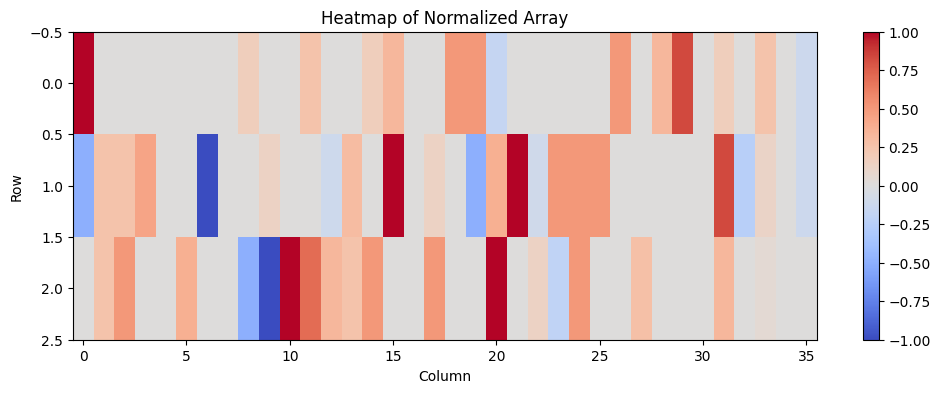

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def main(arr):
    # arr_normalized = 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

    n = len(arr) // 3
    arr_reshaped = arr.reshape(3, n)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 4))

    # Plot the heatmap
    im = ax.imshow(arr_reshaped, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

    # Add a colorbar
    plt.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title('Heatmap of Normalized Array')
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')

    # Show the plot
    plt.show()

main(recallDiffs)


In [ ]:
print([len(x) for x in evalDatasetFiltered2])

[11, 8, 12, 9, 8, 8, 17, 6, 6, 12, 11, 13, 3, 1, 2, 2, 11, 7, 11, 12, 5, 4, 0, 9, 8, 17, 13, 2, 13, 12, 3, 6, 3, 7, 1, 4]


In [ ]:
print(rougeRecall40)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.16666666666666666, 0.0, 0.0, 0.5, 0.5, 0.0, 0.16666666666666666, 0.6666666666666666, 0.0, 0.0, 1.0, 0.5, 0.0, 0.125, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.3333333333333333, 1.0, 0.25, 0.3333333333333333, 0.0, 0.25, 0.25, 0.0, 0.0, 0.25, 0.25, 0.4444444444444444, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.25, 0.0, 0.0, 0.0, 0.3, 0.0, 1.0, 0.0, 0.25, 0.0, 0.0, 0.375, 1.0, 0.1, 0.5, 0.5, 1.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.8333333333333334, 0.25, 0.3333333333333333, 0.0, 0.125, 0.125, 0.5, 0.5, 0.25, 0.5, 0.375, 0.0, 0.2222222222222222, 0.0, 0.0, 1.0, 0.7, 0.3333333333333333, 0.25, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.125, 0.0, 0.5, 0.0, 0.0, 0.4444444444444444, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.15, 0.0, 1.0]


In [ ]:
correct = 0
incorrect = 0
for index, (val1, val2) in enumerate(zip(rougeRecall35, rougeRecall40)):
  if val2 >= val1:
    correct += 1;
    print(str(val1) + " " + str(val2))
  else:
    incorrect += 1;

print(correct)
print(incorrect)

0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.25 0.25
0.0 0.0
0.0 0.16666666666666666
0.0 0.0
0.0 0.0
0.25 0.5
0.5 0.5
0.0 0.0
0.0 0.16666666666666666
0.3333333333333333 0.6666666666666666
0.0 0.0
0.0 0.0
0.5 1.0
0.0 0.5
0.125 0.125
0.0 0.0
0.5 0.5
0.0 0.0
0.0 0.0
0.0 0.5
0.0 0.0
0.0 0.3333333333333333
0.16666666666666666 1.0
0.25 0.25
0.16666666666666666 0.3333333333333333
0.0 0.0
0.0 0.25
0.25 0.25
0.0 0.25
0.0 0.25
0.0 0.4444444444444444
0.0 0.0
0.0 0.0
0.3333333333333333 0.3333333333333333
0.0 0.0
0.125 0.25
0.0 0.0
0.0 0.0
0.0 0.3
0.0 0.0
0.0 1.0
0.0 0.0
0.125 0.25
0.0 0.0
0.0 0.375
0.0 1.0
0.0 0.5
0.0 0.5
0.5 1.0
0.0 0.0
0.3333333333333333 0.3333333333333333
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.8333333333333334
0.2222222222222222 0.3333333333333333
0.0 0.0
0.125 0.125
0.25 0.5
0.0 0.5
0.25 0.25
0.5 0.5
0.0 0.375
0.0 0.0
0.2222222222222222 0.2222222222222222
0.0 1.0
0.0 0.7
0.0 0.3333333333333333
0.0 0.25
0.0 0.5
0.0 0.0
0.5 0.5
0.5 1.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.125
0.0 0

In [ ]:
rougeRecall40

[0.0,
 0.0,
 0.125,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.7777777777777777,
 0.625,
 1.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.125,
 0.1,
 0.1,
 0.0,
 0.75,
 0.125,
 0.5,
 0.0,
 0.0,
 0.125,
 0.25,
 0.0,
 0.16666666666666666,
 0.0,
 0.2,
 0.5,
 0.0,
 0.25,
 0.5,
 0.16666666666666666,
 0.08333333333333333,
 0.5,
 0.08333333333333333,
 0.0,
 0.25,
 1.0,
 0.0,
 0.16666666666666666,
 0.5,
 0.3416666666666667,
 0.0,
 0.3333333333333333,
 0.5,
 0.6666666666666666,
 0.0,
 0.0,
 0.25,
 0.3333333333333333,
 0.0,
 0.25,
 0.0,
 0.0,
 0.3333333333333333,
 0.3958333333333333,
 0.0,
 0.0,
 0.25,
 1.0,
 0.0,
 0.125,
 0.25,
 0.0,
 0.25,
 0.5,
 0.3333333333333333,
 0.29166666666666663,
 0.0,
 0.5,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.5,
 0.2,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0]

#### Sanity Check with direct calls

In [ ]:
def gptComplete(text, engine=model, stop=None):
  output = client.chat.completions.create(
      model=engine,
      messages=[
          {"role": "system", "content": "You are a Lean 4 Assistant meant to provide helpful responses to Lean questions."},
          {"role": "user", "content": text},
      ],
      temperature=0.0,
      n=1,
      stop=stop,
      logprobs=None
  )

  return output

In [ ]:
def compute_rouge(word, question):
    rouge = Rouge()
    scores = rouge.get_scores(question, word)
    return scores[0]['rouge-l']['r']

In [ ]:
compute_rouge("Hello am", "Hello am cat")

1.0

In [ ]:
sampleQ = newTotalAnsArr2[5][5]

In [ ]:
sampleQ['keywords']

['functional extensionality',
 "Lean's type theory",
 'bound variables',
 'additional axiom',
 'FAQ page']

In [ ]:
sampleQ['answer']

"The `rw` tactic in Lean does allow rewriting under quantifiers, but it has a specific limitation: the rewritten term cannot reference any of the bound variables within the quantifier. This can be confusing for beginners because it seems like `rw` should be able to rewrite in all contexts. The `simp_rw` tactic, on the other hand, uses the `simp` tactic internally, which employs different techniques that allow it to rewrite under binders more reliably. This is because `simp` can use functional extensionality (`funext`) to navigate into subexpressions within binders, something `rw` cannot do as effectively. However, `simp` can only rewrite one thing at a time, which can be a limitation in cases involving complicated dependent types. Additionally, in Lean's type theory, functional extensionality does not hold without an additional axiom (`quot.sound`), which is necessary for rewriting under a lambda. This distinction is crucial for understanding why `rw` and `simp_rw` behave differently a

In [ ]:
evalDatasetFiltered2

In [ ]:
import json

AttributeError: 'str' object has no attribute 'read'

In [ ]:
json.loads('{"results": [true, true, true, true, true, true, true]}')

{'results': [True, True, True, True, True, True, True]}

In [ ]:
def run_eval(eval_set, model):
  #messageTestSet = compile_questions(eval_set)
  rougeRecalls = []

  for cluster in eval_set:
    print(len(cluster))
    for message in cluster:
      question = message['question']
      keywords = message['keywords']

      # response = gptComplete(question, model)

      # response = response.choices[0].message.content
      response = message['answer']

      total = 0
      for word in keywords:
        total += compute_rouge(word, response)
      if len(keywords) != 0:
        total /= len(keywords)
        rougeRecalls.append(total)

  return rougeRecalls

    #resp = resp['response']['body']['choices'][0]['message']['content']

In [ ]:
sum(len(x) for x in evalDatasetFiltered)

338

In [ ]:
run_eval(evalDatasetFiltered, 3)

12
10
14
12
10
10
20
8
7
13
13
15
3
3
3
4
13
10
13
12
5
4
0
12
12
21
16
3
16
13
4
6
4
10
2
5


[1.0,
 1.0,
 0.5,
 0.8333333333333333,
 0.0,
 0.5,
 0.75,
 0.75,
 1.0,
 0.8333333333333334,
 1.0,
 1.0,
 1.0,
 0.5,
 0.0,
 0.75,
 0.7,
 0.0,
 1.0,
 1.0,
 0.7666666666666666,
 1.0,
 0.16666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.5,
 1.0,
 1.0,
 0.5,
 0.1111111111111111,
 0.3333333333333333,
 1.0,
 0.16666666666666666,
 1.0,
 1.0,
 0.875,
 0.75,
 1.0,
 0.4,
 1.0,
 1.0,
 0.0,
 1.0,
 0.16666666666666666,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.0,
 0.6666666666666666,
 0.5,
 0.9333333333333332,
 0.5,
 0.4,
 1.0,
 0.25,
 0.875,
 0.7,
 0.06666666666666667,
 1.0,
 0.9,
 0.5,
 1.0,
 0.8,
 0.25,
 0.0,
 0.8,
 0.5,
 1.0,
 0.9,
 1.0,
 1.0,
 0.75,
 0.0,
 0.5,
 0.6875,
 1.0,
 0.75,
 0.5,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.625,
 0.8888888888888888,
 1.0,
 1.0,
 1.0,
 0.125,
 0.8,
 1.0,
 0.5833333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 1

In [ ]:
model35Rouge = run_eval([sampleQ], 'gpt-3.5-turbo-0125')
model4Rouge = run_eval([sampleQ], 'gpt-4o')

In [ ]:
model35Rouge, model4Rouge

([0.0012048192771084338], [0.0020942408376963353])